## Lesson 9 - Text Classification




### Table of Contents

* [Multi-Class, Multi-Label](#multi)
* [Using jieba to extract TF-IDF tags  with 五月天 乾杯](#TF-IDF-jieba)
* [TF-IDF + SVM baseline Classification](#TF-IDF-SVM)
* [以 TF-IDF、餘弦相似度演算法實作相似句機率](#cosSim)
* [Text Classification with Naive Bayes Classifier in Chinese(small data)](#Naive-Bayes-Classifier-Chinese)
* [Save stopwords as pickle](#save-stopwords-as-pickle)
* [Text Classification With Naive Bayes 三個分類：3C、美妝、美食(larger data)](#Text-Classification-With-Naive-Bayes)
* [Text Classification with XGBoost Classifier](#Text-Classification-With-XGBoost)
* [Bounus round: Traditional, Simplified Chinese and English](#Traditional-Simplified-Chinese)
* [Bounus round: Multi-Class Text Classification with Scikit-Learn](#Multi-Class-Text-Classification-with-Scikit-Learn)


<a id="multi"></a>
## Multi-Class, Multi-Label

多類別文章分類與標籤文章分類

### 文章分類介紹

多類別文章分類和多標籤文章分類的的區別

- Multi-Class：多類別/多元分類（二分類、三分類、多分類等）
    - 二分類：判斷郵件屬於哪個類別，垃圾或者非垃圾
    - 二分類：判斷新聞屬於哪個類別，機器寫的或者人寫的
    - 三分類：判斷文本情感屬於{正面，中立，負面}中的哪一類
    - 多分類：判斷新聞屬於哪個類別，如財經、體育、娛樂等

- Multi-Label：多標籤分類
    - 文本可能同時涉及任何宗教，政治，金融或教育，也可能不屬於任何一種。
    - 電影可以根據其摘要內容分為動作，喜劇和浪漫類型。有可能電影屬於 romcoms (浪漫與喜劇)等多種類型。

- 二者區別
    - 多分類任務中一條資料只有一個標籤，但這個標籤可能有多種類別。比如判定某個人的性別，只能歸類為"男性"、"女性"其中一個。再比如判斷一個文本的情感只能歸類為"正面"、"中面"或者"負面"其中一個。
    - 多標籤分類任務中一條資料可能有多個標籤，每個標籤可能有兩個或者多個類別（一般兩個）。例如，一篇新聞可能同時歸類為"娛樂"和"運動"，也可能只屬於"娛樂"或者其它類別。

舉例：

假設個人愛好的集合一共有6個元素：運動、旅遊、讀書、工作、睡覺、美食
<img src="images/Multi-Class_Multi-Label.png">


<a id="TF-IDF-jieba"></a>
## Using jieba to extract TF-IDF tags and re signed weights (Tf-idf權重)

```
sentence 為待提取的文章 (由句子連結成大的字串組成 str)

topK 為回傳幾個 TF/IDF 權重最大的關鍵詞，預設為 20

withWeight 為是否一併回傳關鍵詞權重值，預設為 False

allowPOS 僅包括指定詞性的詞彙，預設值為空值，即不篩選
```

In [1]:
# import jieba 並使用繁中字典
import jieba.analyse
jieba.set_dictionary("dict/dict.big.txt")
# 將乾杯這首歌的關鍵字詞取出來 
# topK代表要取的關鍵字次數 
dict_ = {}
with open("data/lyrics/single_song.txt", "r", encoding="utf-8") as f:
    for line in f:
        tags = jieba.analyse.extract_tags(line, topK=10, withWeight=True)
        for tag, weight in tags:
            dict_[tag] = int(weight * 10000)
            #print(tag + "," + str(int(weight * 10000)))

Building prefix dict from D:\Programming\Python\課程教學\David Python 教育訓練\dict\dict.big.txt ...
Loading model from cache C:\Users\princ\AppData\Local\Temp\jieba.u9fe11b2227c896c5bbad65bb17730314.cache
Loading model cost 1.360 seconds.
Prefix dict has been built succesfully.


In [2]:
resorted = sorted(dict_, key=lambda x : dict_[x], reverse=True) 
for x in resorted:
    r = "{},{}".format(x, dict_[x])
    print(r)

乾杯,119547
阿信,64010
作詞,59773
懷念,59773
流淚,59773
不斷,59773
來到,59773
身邊,47819
作曲,43913
編曲,39849
于京延,39849
時間,39849
舉起,39849
回憶,39849
那個,39849
永遠,39849
這些,39849
四輪,39849
單眼,39849
萬歲,39849
他們,39849
回來,39849
五月天,39011
天空,34524
歲月,29886
眼淚,29886
那一張,29886
邊哭邊,29886
還要,29886
擁抱,29886
諾亞方舟,29886
堅強,29886
笑點,29886
哭點,29886
有時候,29886
光陰,29886
滄海桑田,29886
遠走高飛,29886
力氣,29886
悠悠的,29553
回不去,25467
一杯,24367
友情,24094
不會,23909
也許,23909
終點,23909
流著,23909
喝著,23909
操場,23909
說好,23909
無論如何,23909
發現,23909
還是,23909
沒睡,23909
電話,23909
準備,23909
終究會,23909
我們,23909
變成,23909
走過,23909
人間,23909
說出,23909
沒說,23909
感謝,23909
誓言,23393
汽水,20869
如果說,19924
選出,19924
畫面,19924
起來,19924
可愛,19924
可憐,19924
總是,19924
不談,19924
條件,19924
衝破,19924
衝出,19924
未來,19924
現在,19924
為什麼,19924
望著,19924
視線,19924
幻滅,19924
一場,19924
磨練,19924
夢想,19924
越磨,19924
不見,19924
他會,19924
開個,19924
同學會,19924
退回,19639
宿醉,18867
可歌可泣,18016
一天,17936
考卷,17871
浮現,17078
那滴,17078
藍天,17078
畢業,17078
認命,17078
倒退,16942
汗水,16782
今天,16640
小到,16086
剩下,15586
宿命,14420
匆匆,13895
一回,134

<a id="TF-IDF-SVM"></a>
## TF-IDF + SVM baseline Classification

In [3]:
# coding:utf-8

import sys
import numpy as np
import jieba
import pickle
# reload(sys)
# sys.setdefaultencoding( "utf-8" )

from jieba import analyse
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.svm import SVC

def segmentWord(text):
    punct = set(u''':!),.:;?]}$¢'"、。〉》」』】〕〗〞︰︱︳﹐､﹒﹔﹕﹖﹗﹚﹜﹞！），．：；？｜｝︴︶︸︺︼︾﹀﹂﹄﹏､～￠々‖•·ˇˉ―--′’”([{£¥'"‵〈《「『【〔〖（［｛￡￥〝︵︷︹︻︽︿﹁﹃﹙﹛﹝（｛“‘-—_…''')
    words = [word for word in jieba.cut(text, cut_all=True) if (len(word.strip()) >= 2) and ( not any(ext in word for ext in punct) )]
    return " ".join(words)

# 一共分成3類，並且類別的標識定為0，1，2
category_ids = range(0, 3)

class_label = {
    0:'遊戲',
    1:'汽車',
    2:'女性',
}

corpus = []
with open ("data/simpleclassify/game.txt", "r", encoding="utf-8") as f:
    list_data = f.readlines()
corpus.append(segmentWord(" ".join(list_data)))

with open ("data/simpleclassify/automobile.txt", "r", encoding="utf-8") as f:
    list_data = f.readlines()
corpus.append(segmentWord(" ".join(list_data)))

with open ("data/simpleclassify/women.txt", "r", encoding="utf-8") as f:
    list_data = f.readlines()
corpus.append(segmentWord(" ".join(list_data)))

with open('model/Sklearn/SVM/model_svc_corpus.pkl', 'wb') as handle:
    pickle.dump(corpus, handle, protocol=pickle.HIGHEST_PROTOCOL)

# s = '''現在我們全家都用台灣月子中心大全狂搜台北地區的月子中心，本來是我媽想要自己顧幫我姊坐月子啦!但想想媽媽一個人年紀也大了，還是花錢去月子中心吧!而且我媽觀念就是一個月不可以洗頭的那種~我姊應該會受不了吧~想問問版上大家生完多久洗頭阿?哈哈!可以和我分享坐月子時的經驗嗎?'''
# s = '''蘿拉蜜絲-極限超時親膚30ml，香奈兒-緊緻無暇30ml 蘿拉蜜思-燭光聚焦(小小試用瓶那個)30ml 瑪珂蕾貝潤澤透顏持妝精華粉底(白色那瓶)正貨就是13ml YSL-超模聚焦30ml 先說先說，我的皮膚並不好，屬敏感肌，而且毛孔粗大，外油內乾，所以粉底液不適合就立馬脫妝'''
# s = '''自從致命病毒在紐約爆發，並傳染至全世界後，已經過去了七個月，人口大幅下降。當病毒爆發時，國土戰略局，一群以普通市民身份潛藏在人群中的特工，被喚醒成為最後一道防線。自此之後，國土戰略局特工不屈不撓地戰鬥著，拯救殘存的一切。'''
# s = '''全球新玩家、老玩家都熱烈關注的Capcom經典大作重製版《惡靈古堡RE2》，距離上市日期已不遠，近期除了開放特別的「30分鐘限定體驗版」造成話題之外，許多老玩家非常期待的「第四生還者」與「豆腐模式」（在《惡靈古堡RE2》被定名為：「第4倖存者」與「豆腐倖存者」）也終於有了最新的遊戲截圖公布！漢克與豆腐在高解析度畫面登場，實在非常令老玩家感到懷念又驚喜！'''
s = '''由 Respawn Entertainment 以《泰坦降臨》世界觀製作的大逃殺射擊遊戲《APEX 英雄》人氣高漲，遊戲推出後僅一週玩家人數就突破 2500 萬，不僅在直播平台 Twitch 上的觀看更竄升至排行榜第一、超越《要塞英雄（暫譯，原名：Fortnite）》，更讓 Twitch 緊接著就發起了《APEX 英雄》Twitch Rivals 聯賽，首次賽事於太平洋時間 2 月 12 日下午 2 時開打。'''
# s = '''Hybrid油電複合動力系統百家爭鳴，可要說早期投入且有穩定口碑，勢必為豐田集團旗下品牌，其中Lexus更是各車系皆有Hybrid車型規劃，而去年11月導入販售的UX車系，終於也在今年初補齊陣容，正式開始販售UX250h Hybrid油電複合動力車型；如同以往，UX250h身為Hybrid油電複合動力車型，自然是擔綱UX車系旗艦車型角色，雖然這次少了F Sport套件包裝，但動力系統、配備都比UX200菁英版及其F Sport車型'''
# s = '''Outlander是Mitsubishi的國產休旅銷售主力，去年底推出的19年式車型也免不了經過一番更動並增加多項配備提昇產品競爭力；其中有一點較值得注意的，便是取消原有的4WD七人座車型，並在2WD車型中增加了一款七人座車型，如此一來當然也降低不少入主七人座SUV的門檻。今日試駕的，即為19年式Outlander 2WD車型中新增的七人座版本。'''

seg_documents = list(jieba.cut(s.replace("\n",""),cut_all=False))
print(" ".join(seg_documents))
corpus.append(" ".join(seg_documents))

vectorizer=CountVectorizer()
csr_mat = vectorizer.fit_transform(corpus)
transformer=TfidfTransformer()
tfidf=transformer.fit_transform(csr_mat)
y = np.array(category_ids)

# 用前3已標分類的資料做模型訓練
model = SVC()
model.fit(tfidf[0:3], y)

# 對5行以後未標注分類的資料做分類預測
predicted = model.predict(tfidf[3:])
idx = predicted.astype(int)
# print(tfidf[3:])
print(class_label[idx[0]])

print("Done")

由   Respawn   Entertainment   以 《 泰坦 降臨 》 世界觀 製 作 的 大逃殺 射擊 遊戲 《 APEX   英雄 》 人氣 高漲 ， 遊戲 推出 後 僅一週 玩家 人數 就 突破   2500   萬 ， 不僅 在 直播 平台   Twitch   上 的 觀看 更 竄 升至 排行榜 第一 、 超越 《 要塞 英雄 （ 暫譯 ， 原名 ： Fortnite ） 》 ， 更 讓   Twitch   緊接著 就 發起 了 《 APEX   英雄 》 Twitch   Rivals   聯賽 ， 首次 賽事 於 太平洋 時間   2   月   12   日 下午   2   時 開打 。
遊戲
Done


D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Load svm corpus

In [4]:
import pickle

with open('model/Sklearn/SVM/model_svc_corpus.pkl', 'rb') as handle:
    svm_corpus = pickle.load(handle)

In [5]:
len(svm_corpus)

3

In [6]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn", lineno=196)

import jieba
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC

category_ids = range(0, 3)

class_label = {
    0:'遊戲',
    1:'汽車',
    2:'女性',
}

class SVMClassifier(object):
    
    def __init__(self, svm_corpus):
        super(SVMClassifier, self).__init__()    
        self.c = svm_corpus
        
    def predict_svm_classifier(self, svm_corpus, stt):
        seg_documents = list(jieba.cut(stt.replace("\n",""),cut_all=False))
        #print(" ".join(seg_documents))
        add_list = []
        add_list.append(" ".join(seg_documents))
        t = self.c+add_list
        vectorizer=CountVectorizer()
        csr_mat = vectorizer.fit_transform(t)
        transformer=TfidfTransformer()
        tfidf=transformer.fit_transform(csr_mat)
        y = np.array(category_ids)
        # 用前3已標分類的資料做模型訓練
        model = SVC()
        model.fit(tfidf[0:3], y)

        # 對5行以後未標注分類的資料做分類預測
        predicted = model.predict(tfidf[3:])
        idx = predicted.astype(int)
        # print(class_label[idx[0]])
        return idx[0], " ".join(seg_documents)

In [7]:
# s = '''現在我們全家都用台灣月子中心大全狂搜台北地區的月子中心，本來是我媽想要自己顧幫我姊坐月子啦!但想想媽媽一個人年紀也大了，還是花錢去月子中心吧!而且我媽觀念就是一個月不可以洗頭的那種~我姊應該會受不了吧~想問問版上大家生完多久洗頭阿?哈哈!可以和我分享坐月子時的經驗嗎?'''
# s = '''蘿拉蜜絲-極限超時親膚30ml，香奈兒-緊緻無暇30ml 蘿拉蜜思-燭光聚焦(小小試用瓶那個)30ml 瑪珂蕾貝潤澤透顏持妝精華粉底(白色那瓶)正貨就是13ml YSL-超模聚焦30ml 先說先說，我的皮膚並不好，屬敏感肌，而且毛孔粗大，外油內乾，所以粉底液不適合就立馬脫妝'''
# s = '''自從致命病毒在紐約爆發，並傳染至全世界後，已經過去了七個月，人口大幅下降。當病毒爆發時，國土戰略局，一群以普通市民身份潛藏在人群中的特工，被喚醒成為最後一道防線。自此之後，國土戰略局特工不屈不撓地戰鬥著，拯救殘存的一切。'''
# s = '''全球新玩家、老玩家都熱烈關注的Capcom經典大作重製版《惡靈古堡RE2》，距離上市日期已不遠，近期除了開放特別的「30分鐘限定體驗版」造成話題之外，許多老玩家非常期待的「第四生還者」與「豆腐模式」（在《惡靈古堡RE2》被定名為：「第4倖存者」與「豆腐倖存者」）也終於有了最新的遊戲截圖公布！漢克與豆腐在高解析度畫面登場，實在非常令老玩家感到懷念又驚喜！'''
# s = '''由 Respawn Entertainment 以《泰坦降臨》世界觀製作的大逃殺射擊遊戲《APEX 英雄》人氣高漲，遊戲推出後僅一週玩家人數就突破 2500 萬，不僅在直播平台 Twitch 上的觀看更竄升至排行榜第一、超越《要塞英雄（暫譯，原名：Fortnite）》，更讓 Twitch 緊接著就發起了《APEX 英雄》Twitch Rivals 聯賽，首次賽事於太平洋時間 2 月 12 日下午 2 時開打。'''
# s = '''Hybrid油電複合動力系統百家爭鳴，可要說早期投入且有穩定口碑，勢必為豐田集團旗下品牌，其中Lexus更是各車系皆有Hybrid車型規劃，而去年11月導入販售的UX車系，終於也在今年初補齊陣容，正式開始販售UX250h Hybrid油電複合動力車型；如同以往，UX250h身為Hybrid油電複合動力車型，自然是擔綱UX車系旗艦車型角色，雖然這次少了F Sport套件包裝，但動力系統、配備都比UX200菁英版及其F Sport車型'''
s = '''Outlander是Mitsubishi的國產休旅銷售主力，去年底推出的19年式車型也免不了經過一番更動並增加多項配備提昇產品競爭力；其中有一點較值得注意的，便是取消原有的4WD七人座車型，並在2WD車型中增加了一款七人座車型，如此一來當然也降低不少入主七人座SUV的門檻。今日試駕的，即為19年式Outlander 2WD車型中新增的七人座版本。'''

sv = SVMClassifier(svm_corpus)
idx, seg = sv.predict_svm_classifier(svm_corpus, s)
print(seg)
print("predict: {}".format(class_label[idx]))

Outlander 是 Mitsubishi 的 國產 休旅 銷售 主力 ， 去年底 推出 的 19 年式 車型 也 免不了 經過 一番 更動 並 增加 多項 配備 提 昇 產品 競爭力 ； 其中 有 一點 較 值得注意 的 ， 便是 取消 原有 的 4WD 七人座 車型 ， 並在 2WD 車型 中 增加 了 一款 七人座 車型 ， 如此 一來 當然 也 降低 不少 入主 七人座 SUV 的 門檻 。 今日 試駕 的 ， 即為 19 年式 Outlander   2WD 車型 中 新增 的 七人座 版本 。
predict: 汽車


D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<a id="cosSim"></a>
## 以 TF-IDF、餘弦相似度演算法實作相似句機率

設計說明
- 使用 jieba 切詞，設定自定義字典
- 使用 TF-IDF 演算法，找出文章的關鍵詞
- 每篇文章各取出n個關鍵詞（比如20個），合併成一個集合，計算每篇文章對於這個集合中的詞的詞頻
- 產生兩篇文章各自的詞頻向量
- 計算兩個向量的餘弦相似度，值越大就表示越相似。

In [8]:
import re
import jieba
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

zhPattern = re.compile(u'[\u4e00-\u9fa5]+')
twPattern = re.compile(u'[\u4e00-\u9fff]+')

class cosSim:
    def __init__(self, logger=None):
        pass
    def cos_sim(self, vector_a, vector_b):
        """ 
        計算兩個向量之間的cosine 餘弦相似度
        :param vector_a: 向量 a 
        :param vector_b: 向量 b
        :return: sim
        """
        vector_a = np.mat(vector_a)
        vector_b = np.mat(vector_b)
        num = float(vector_a * vector_b.T)
        denom = np.linalg.norm(vector_a) * np.linalg.norm(vector_b)
        cos = num / denom
        sim = 0.5 + 0.5 * cos
        return sim

    def getVocabulary(self, corpuss):
        vectorizer = CountVectorizer(max_features=500)  # 該類會將文章中的詞彙轉換為詞頻矩陣，矩陣元素a[i][j] 表示j詞在i類文本下的詞頻
        transformer = TfidfTransformer()  # 該類會統計每個詞語的tf-idf權值
        tfidf = transformer.fit_transform(
            vectorizer.fit_transform(corpuss))  # 第一個fit_transform是計算tf-idf，第二個fit_transform是將文章轉為詞頻矩陣
        words = vectorizer.get_feature_names()  # 獲取詞袋模型中的所有詞彙
        #print("words %s", words)
        return words

    def getVector(self, corpus, vocabulary):
        #print("corpus %s", corpus)
        vectorizer = CountVectorizer(vocabulary=vocabulary)  # 該類會將文章中的詞語轉換為詞頻矩陣，矩陣元素a[i][j] 表示j詞在i類文章下的詞頻
        transformer = TfidfTransformer()  # 該類會統計每個詞語的tf-idf權值
        #print("tf矩陣 %s", vectorizer.fit_transform(corpus))
        tfidf = transformer.fit_transform(
            vectorizer.fit_transform(corpus))  # 第一個fit_transform是計算tf-idf，第二個fit_transform是將文章轉為詞頻矩陣
        weight = tfidf.toarray()  # 將tf-idf矩陣抽取出來，元素a[i][j]表示j詞在i類文章中的tf-idf權重
        # weight = sorted(weight[0], reverse=True)
        #print("weight %s", weight)
        return weight

    def CalcuSim(self, texts=[]):
        """
        @:param list 需要對比的句子
        """
        if len(texts) != 2:
            raise Exception("texts長度必須為2")
        corpuss = [" ".join(jieba.cut(text)) for text in texts]
        vocabulary = self.getVocabulary(corpuss)
        v = self.getVector(corpuss, vocabulary=vocabulary)
        return self.cos_sim(v[0], v[1])

In [9]:
texts = [item for item in sys.argv[1:]]
texts = [
    "台股在短短2個月急漲後，已完全反映美中貿易戰獲得解決的預期，接下來一段時間，台股將處於區間盤整，待第2季半導體庫存消化結束，及市場開始對下半年及明年企業獲利成長動能有更樂觀的預期下，台股才有望再拉出較大波段的行情。 惟從過往外資的交易觀察，年初以來外資在台股累積近千億元的買超金額，只是初步的資金建立部位，據統計，外資連續2個月呈現淨匯入，匯入金額達63.68億美元，合約2000億台幣，雖稱不上是歷史大量，但依照外資往往精算過匯市的波動風險才進行匯入來看，外資這股資金活水，非來得突然。 綜觀過往，台股每一次修正後的底部，幾乎都是外資大量進場撈底撿便宜而浮現，之後的台股雖不見得一路向上，甚至外資在底部大舉進場後，之後的1～2個月、甚至1季，台股仍會回檔修正，但回測後的底部，往往也因為外資資金的持續逢低流入，出現一底比一底高的情形，今年初來外資大量買進台股的動作，和過往幾次撈底有異曲同工之妙，倘若如此，這波拉回修正後的台股，將值得投資人加以把握。 不僅僅麥格理證券對台股釋出正面看法，大和國泰最新出爐的台股策略報告也判斷，第1季很可能是台股全年最低點，該機構同樣看好下半年台股的景氣復甦行情，預料台股將在9100～11300點間高檔震盪。 接下來，企業獲利基本面的回升，才會是外資進一步加碼的重要依據。其中，鏡頭廠大立光(3008)就是最好的示範，也堪稱是這波維繫外資投資信心的中流砥柱。 大立光接連公布的營收及業績，都優於外資法人預期，過去1個多月，外資幾乎天天加碼，大立光目標價也一再被調高，繼亞系外資券商大和及野村於3月5日分別調升大立光目標價至5060元及5068元後，重量級外資券商美林更在3月11日大動作宣布調升蘋果(AAPL.US)評等，連同蘋概股大立光目標價也從4400元調升至5000元，這激勵了大立光股價再創波段新高，自1月份的2880元低點以來，大立光波段累積漲幅已逾6成，外資也更進一步確認科技股可望自谷底開始復甦。",
    "印度股市上週獲外資買超逾16億美元，創近兩年最強、亞股吸金之最將文章分享到： 　 2019年03月18日 法人動態：印度股市上週獲外資買超逾16億美元，創近兩年最強、亞股吸金之最 【財訊快報／記者劉居全報導】英國脫歐雜音干擾國際資金動向，上週外資對亞股有買有賣，主要買氣集中在東北亞台韓雙市以及南亞的印度股市，外資上週分別買超台韓1.42億美元與1.27億美元，另外，隨著印度大選日期確定，降低市場對選情的不確定性，吸引外資大舉回補印度股市，統計上週國際資金單週買超印度股市逾16億美元，不僅推升外資連續買超印度股市進入第4週，且為單週亞股吸金之最，買超金額更改寫近兩年來(2017年4月3日當週)以來最高金額。上週東協市場普遍表現較為遜色，泰國、印尼、馬來西亞單週皆失血逾1億美元，僅有菲律賓股市力守資金淨流入。不過，就上週亞股表現來看，除泰股小幅下跌外，其它市場在內外資買氣同步加持下，週線全數收漲，其中以外資單週買超金額最高的印度股市大漲3.69%最強，台灣、南韓、越南股市亦繳出近2%的好成績。至於今年來外資動向，仍可看出明顯偏好東北亞與南亞市場，截至上週五為止，以印度年迄今吸金逾47億美元最高，其次為南韓股市近40億美元，台股今年來吸金近35億美元位居第三。東協市場方面，則有印尼、菲律賓、越南呈現吸金態勢，泰國與馬來西亞股市今年來則雙雙失血。摩根亞太入息型產品經理張乃文指出，雖然上週外資對亞股態度暫持部份保留，但事實上，從今年亞洲股匯市表現來看，在信心回暖的帶動下，不論股票或匯市皆全面翻揚，配合亞洲國家的貨幣政策轉趨寬鬆，使得亞洲金融環境壓力緩和，包括中國自1月以來的降準、印度降息，另外，泰國、菲律賓、印尼則維持利率不變，並使用仍維持貨幣政策寬鬆或是維持金融穩定等措詞。張乃文表示，隨著強勢美元趨勢不再，以及聯準會偏鴿的態度令美債殖利率不再大幅攀升，有助於國際資金再度自美元資產轉往非美元標的，配合人民幣走勢進入2019年以來表現回穩，除了具有穩定整體新興市場貨幣走勢之效，對於臨近的亞洲匯市更具有正面加持作用。張乃文認為，亞洲股市自去年來歷經上下震盪，且幅度持續加劇，但從今年亞洲的表現可知道，波動不代表行情結束，事實上，從歷史經驗來看，在多重政治與政策雜音干擾之下，亞股波動走勢實為常態，根據自1988年以來的統計，儘管MSCI亞太(不含日本)指數平均年度內下跌幅度達20%，但在31年中，仍有逾六成、19年的年度報酬為正數。張乃文指出，投資人若想以較為穩健的方式參與亞洲行情，不妨以股債並進強化投資效益，具統計，若在金融海嘯後任一月底進場，以各持有50%方式投資MSCI亞太(不含日本)指數與JPMorgan亞洲債券指數，進入第二年之後報酬率可達雙位數，且正報酬機率高達近九成。中國市場方面，摩根中國型產品經理張乃文表示，中國兩會正式落幕，中國總理李克強表示，將保持經濟運行在合理區間，誓言做到穩經濟、保就業。貨幣政策不搞「大水漫灌」，而是透過貨幣工具讓實體經濟得到支撐。張乃文指出，實施更大規模的減稅降費措施也是未來中國市場的重要政策紅利，包括4月1日起實施降企業增值稅、5月1日降社保稅，這些「壯士斷腕」的深化改革政策，就是為了要「放水養魚」，讓利給製造業等基礎行業和民營中小企業，建立有利民營企業穩定發展的宏觀條件，同時表明不會以匯率為競爭手段。張乃文強調，中方亦持續釋出善意，快速通過外商投資法草案，預計2020年實施，在中美貿易尚在談判的期間，市場認為該草案在智財權、技術轉讓和徵收與補償等方面，雖有所著墨惟法條措辭籠統，中國官方仍有操作空間，草案僅為態度上對美國示好。不過較需要留意的是，近期川普改變態度，明言不急與中方達成協議，由於中美貿易問題仍將牽動全球敏感神經，仍須進一步觀察中美貿易協商的風險。",
    "至於今年來外資動向，仍可看出明顯偏好東北亞與南亞市場，截至上週五為止，以印度年迄今吸金逾47億美元最高，其次為南韓股市近40億美元，台股今年來吸金近35億美元位居第三。東協市場方面，則有印尼、菲律賓、越南呈現吸金態勢，泰國與馬來西亞股市今年來則雙雙失血。 摩根亞太入息型產品經理張乃文指出，雖然上週外資對亞股態度暫持部份保留，但事實上，從今年亞洲股匯市表現來看，在信心回暖的帶動下，不論股票或匯市皆全面翻揚，配合亞洲國家的貨幣政策轉趨寬鬆，使得亞洲金融環境壓力緩和，包括中國自1月以來的降準、印度降息，另外，泰國、菲律賓、印尼則維持利率不變，並使用仍維持貨幣政策寬鬆或是維持金融穩定等措詞。 張乃文表示，隨著強勢美元趨勢不再，以及聯準會偏鴿的態度令美債殖利率不再大幅攀升，有助於國際資金再度自美元資產轉往非美元標的，配合人民幣走勢進入2019年以來表現回穩，除了具有穩定整體新興市場貨幣走勢之效，對於臨近的亞洲匯市更具有正面加持作用。 張乃文認為，亞洲股市自去年來歷經上下震盪，且幅度持續加劇，但從今年亞洲的表現可知道，波動不代表行情結束，事實上，從歷史經驗來看，在多重政治與政策雜音干擾之下，亞股波動走勢實為常態，根據自1988年以來的統計，儘管MSCI亞太(不含日本)指數平均年度內下跌幅度達20%，但在31年中，仍有逾六成、19年的年度報酬為正數。 張乃文指出，投資人若想以較為穩健的方式參與亞洲行情，不妨以股債並進強化投資效益，具統計，若在金融海嘯後任一月底進場，以各持有50%方式投資MSCI亞太(不含日本)指數與JPMorgan亞洲債券指數，進入第二年之後報酬率可達雙位數，且正報酬機率高達近九成。 中國市場方面，摩根中國型產品經理張乃文表示，中國兩會正式落幕，中國總理李克強表示，將保持經濟運行在合理區間，誓言做到穩經濟、保就業。貨幣政策不搞「大水漫灌」，而是透過貨幣工具讓實體經濟得到支撐。 張乃文指出，實施更大規模的減稅降費措施也是未來中國市場的重要政策紅利，包括4月1日起實施降企業增值稅、5月1日降社保稅，這些「壯士斷腕」的深化改革政策，就是為了要「放水養魚」，讓利給製造業等基礎行業和民營中小企業，建立有利民營企業穩定發展的宏觀條件，同時表明不會以匯率為競爭手段。 張乃文強調，中方亦持續釋出善意，快速通過外商投資法草案，預計2020年實施，在中美貿易尚在談判的期間，市場認為該草案在智財權、技術轉讓和徵收與補償等方面，雖有所著墨惟法條措辭籠統，中國官方仍有操作空間，草案僅為態度上對美國示好。不過較需要留意的是，近期川普改變態度，明言不急與中方達成協議，由於中美貿易問題仍將牽動全球敏感神經，仍須進一步觀察中美貿易協商的風險。",
    "這幾年一步入夏季女孩們除了挑選換季新衣外，各種能展現身材優勢的比基尼也成了大家關注的焦點，知名澳洲休閒服飾品牌ROXY也推出了2017年春夏新款的比基尼與運動服飾，健康性感展現年輕女孩自信一面的ROXY比基尼這兩年在女性中的討論度相當好，適合喜歡從事水上活動又想展現身材的自信女孩們選擇。先為大家送上當天的直播備份，來不及跟上直播的人可以看影片感受一下當天的氣氛。ROXY本身就是一個從水上運動而來的服飾品牌，充滿度假風情的印花圖騰也是它的特色之一，加上2014年起推出的ROXY FITNESS健身系列，服飾設計以女性喜愛的跑步、瑜珈及水上運動作為主打，讓女性從事各項運動時都能兼具機能性與時尚感。而2017春夏ROXY FITENESS健身系列除了延續過去的特色印花與性感剪裁外，加強搭載UPF 50+ 防曬功能及X-TRA LIFE LYCRA超強5倍延展面料，讓熱愛戶外運動的女性在艷陽下運動能更安心不怕曬黑。今年春夏ROXY重點商品之一就是這個蕾絲拼接的幻彩棕櫚系列比基尼，以大膽剪裁展現性感線條，粉彩的棕櫚印花更帶出浪漫夢幻的島嶼氣息！每一個花色ROXY都會推出經典三角式、時尚削肩式、花漾平口式、寬版肩帶式及個性連身款，可以依照自己身型或是運動類型來選擇最適合的比基尼款式。而台灣更獨家推出的鋼圈厚墊式比基尼，提供胸部極佳的支撐力與集中托高，打造出亞洲女孩最想呈現的UP升級效果！名模王心恬身上的就是蕾絲拼接的幻彩棕櫚系列比基尼，充滿率性的度假風情又不失若隱若現的性感。印花圖騰比基尼也有推出裝飾性綁帶式設計，三角罩杯能襯托性感胸型，胸下綁帶設計則是讓腰身更纖細。為衝浪女孩設計的POP SURF系列兼具時尚與機能性，今年POP SURF 以艷染蔚藍為設計主軸，運用水色轉印與金色細部設計完美融合，呈現蔚藍天空落映在靜謐海面的風景，喜愛水上運動的女孩們往往最擔心比基尼穩定性不夠，但防寒衣包緊緊的舒適度又不足，POP SURF系列就是為了性感的海中嬌娃設計，多款背心式設計的比基尼上衣讓在水中動作時不用擔心走光等問題，凸顯修長腿型的三角剪裁泳褲則是在運動時也能展現一點女性的小性感。ROXY FITNESS健身服飾系列主要針對跑步、瑜珈、水上運動等三大運動設計，全系列採用DRY FLIGHT 快乾科技，搭配透氣網眼布料與平車接縫技術，運動時不會感受到縫線摩擦的不適。布料也採用X-TRA LIFE LYCRA 超強5倍延展面料及UPF50+ 防曬功能，讓戶外運動時防護性更好不用擔心因戶外運動而曬黑曬傷。今年的ROXY春夏比基尼發表會還有另一個重點，就是同步宣布ROXY GIRL 選拔開跑號召女孩們一起動起來，加入ROXY FITNESS戶外運動營，有時運動只有一個人做真的很容易半途而廢，在有伙伴一起運動的氣氛下反而會讓運動更有趣。",
    "城市限定系列是由Kiehl's契爾氏紐約設計團隊親自操刀設計，特地將台北最具代表性的地標101與美食如珍珠奶茶、小籠包等，再加上台北捷運、Ubike等城市文化等做成這次包裝上獨特的Kiehl’s紐約插畫風格。直接透過影片帶大家看看這次的Kiehl's Loves Taipei 城市限定系列限量商品，包裝都是由紐約團隊親自設計，可以發現許多台北元素都在上方喔（小編超愛Ubike的～超可愛） 此次Kiehl's Loves Taipei 城市限定系列共有三款明星商品：【冰河醣蛋白保濕霜-城市限量版】、【冰河醣蛋白無油清爽凝凍-城市限量版】與【亞馬遜白泥淨緻毛孔面膜-城市限量版】，品牌表示冰河醣但白保濕霜是品牌最經典知名的保濕單品，而冰河醣蛋白無油清爽凝凍與亞馬遜白泥淨緻毛孔面膜則是特別適合台灣濕熱氣候型態，對於喜愛清爽保濕與注重毛孔清潔的台灣消費者來說都是最實用的單品。冰河醣蛋白保濕霜這款Kiehl's旗下經典保養品，應該跟金盞花精華化妝水一樣堪稱是品牌的鎮店之寶XD，受歡迎的程度讓它全球每15秒就售出一罐。利用來自冰河的極佳保濕成份，能達到有優異的保濕效果，質地是輕潤不厚重的輕質乳霜質地，塗抹後在肌膚上的觸感相當好吸收，就算夏天使用也不覺得有負擔讓肌膚全天都擁有柔嫩平滑的觸感。保濕霜添加萃取自極地的冰河醣蛋白與澳洲白茅，提供肌膚水潤柔嫩的保濕效果，另外更添加親膚性植物果油，保濕霜質地十分輕盈好吸收，補水保濕的同時也不怕造成肌膚負擔，夏天使用也不擔心黏膩。冰河醣蛋白保濕霜的配方十分溫和也不含酒精，敏感肌性肌膚也可以安心使用。而針對台灣人常見的混合型肌膚，冰河醣蛋白無油清爽凝凍就會是一款能讓肌膚乖巧聽話，不會一到中午就變身油臉怪的保養聖品。這款冰河醣蛋白無油清爽凝凍是由Kiehl’s契爾氏，針對夏日保濕需求與混和性肌膚所設計的保養品，跟醣蛋白保濕霜一樣添加了經典冰河醣蛋白與澳洲白茅成份，但運用了獨家智慧型抗油光科技將油份去除，100%無油配方，質地清爽不黏膩，能為肌膚提供保濕鎖水的效果。利用獨家智慧型抗油光科技，保濕的同時還能全天抑制油光，使用方式可每天早晚使用，或當作妝前保濕打底，也可厚敷當晚安面膜使用。小編我則是要大推亞馬遜白泥淨緻毛孔面膜，這款曾經是專櫃斷貨款的白泥面膜每年的產量有限，賣完就真的要等隔年才有機會入手了！Kiehl’s契爾氏亞馬遜白泥淨緻毛孔面膜主打的功能就是深層清潔外、緊緻毛孔，一瓶搞定想擁有水煮蛋肌的清潔需求。這當中的關鍵成份就是來自亞馬遜地區的「亞馬遜白泥」，亞馬遜白泥最主要的功能能深入毛孔清除白頭和黑頭粉刺、髒污與多於油脂，同時也可讓清潔後的毛孔收斂緊緻。透過先清潔再緊緻的方式讓肌膚恢復乾淨細緻。亞馬遜白泥淨緻毛孔面膜主要含有三大明星成分：亞馬遜白泥主打深層清潔臉部粉刺，亞馬遜白泥含有微量元素及豐富礦物質，幫助肌膚軟化同時去除老廢角質，深層清潔臉上髒汙。紫草萃取：主要為溫和緊緻毛孔，紫草萃取能收斂深層清潔後的毛孔，達到緊緻肌膚的效果。最後一項是加入翠葉蘆薈萃取成份，這個成分可以舒緩緊緻毛孔，翠葉蘆薈萃取的高保濕修護成份，能夠舒緩清潔後的毛孔，撫平肌膚。",
    "最可愛的天真女孩凱莉KaiLi肌膚透亮的小心機? 這個成分可以舒緩緊緻毛孔，翠葉蘆薈萃取的高保濕修護成份 #小圓瓶 #美妝界的無他相機 #30秒偽素顏 by 凱莉KaiLi 工作的時候幾乎都上粉底液，但是日常生活出門上妝就太負擔了，等於讓肌膚沒有喘息的時間，所以平常我都用素顏霜！一瓶就可以搞定出門！ 那素顏霜要怎麼挑呢？我這樣選⬇ ✅抗紫外線-防禦UVA/UVB對肌膚的傷害 ✅瞬間美顏-讓自己偽素顏有氣色無妝感 ✅順便保養-竟然含有美白熊果素及保濕成分 ✅不用卸妝-只需一般洗面乳即可洗淨耶 找到一瓶完全符合上述條件的素顏霜?? 就是SHILLS舒兒絲的小蒼蘭抗UV美白濾鏡素顏霜(小圓瓶XD) 不只滿分還有其他超棒的加分優點⬇ 持久不脫妝、經典小蒼蘭香氛、各部位皆可用，有時出外景我也會拿來擦在關節黯沈處，上鏡時全身肌膚才會比較均勻漂亮！ 現在我用它都被誇皮膚好好、輕透不死白真的超自然！ 拍照都不再需要套濾鏡了，我都叫它美妝界無他相機， 這就是我的美顏小心機，是我們之間的秘密哦 ＃SHILLS ＃舒兒絲 ＃國民保養 ＃上妝不用套濾鏡 #美妝界的無他相機 #懶妹變女神 ＃秒間偽素顏 ＃小圓瓶 # 舒緩清潔後的毛孔",
]
corpuss = [" ".join(jieba.cut(text)) for text in texts]
print(len(corpuss))

6


In [10]:
# 並沒有處理標點符號、stopwords或自訂字典
corpuss[1][:30]

'印度 股市 上週 獲 外資 買超 逾 16 億美元 ， 創 '

In [11]:
corpuss[2][:30]

'至於 今年 來 外資 動向 ， 仍 可 看出 明顯 偏好 東'

In [12]:
corpuss[4][:30]

"城市 限定 系列 是 由 Kiehl ' s 契爾氏 紐約 "

In [13]:
# 1與2 相似度高達0.92，表示其斷詞後有較為類似的TF-IDF、BOW向量
a = cosSim()
vocabulary = a.getVocabulary(corpuss)
vec = a.getVector(corpuss, vocabulary=vocabulary)
print(a.cos_sim(vec[1], vec[2]))

0.9229898440197146


In [14]:
# 2與4 相似度低於0.6，表示其斷詞後有較為不類似的TF-IDF、BOW向量
print(a.cos_sim(vec[2], vec[4]))

0.5068929909915356


In [15]:
# 相似度高達0.92，表示其斷詞後有較為類似的TF-IDF、BOW向量
a = cosSim()
vocabulary = a.getVocabulary(corpuss)
vec = a.getVector(corpuss, vocabulary=vocabulary)
print(a.cos_sim(vec[4], vec[5]))

0.6209747825105374


In [16]:
a = cosSim()
# 周杰倫 說好不哭
r = a.CalcuSim(["說妳怎麼了 說妳怎麼過 放不下的人是我", "離開我以後 要我好好過 怕打擾想自由的我"])
print(r)

# TF-IDF
r = a.CalcuSim(["蔡英文是台灣總統", "馬英九是台灣總統"])
print(r)

r = a.CalcuSim(["蔡英文是台灣總統", "韓國瑜是台灣總統"])
print(r)

0.5
0.7515513062075657
0.7515513062075657


### Homework
- AI label on unsupervised data (follow the text file)
- label 0: 財經
- label 3: 美妝
- output 為 Pandas DataFrame

In [17]:
# Hint:
import pandas as pd

DocumentFilePath = 'data/document/UnsupervisedTextData.txt'
with open(DocumentFilePath, 'r+', encoding='utf-8') as readfile:
    data_ = readfile.readlines()

In [18]:
# Answer:
a = cosSim()
context_dic = {}
label_dic = {}
for k, v in enumerate(data_):
    context_dic[k] = v
    for k2, v2 in enumerate(texts):
        if a.CalcuSim([v,v2])>0.51:
            label_dic[k]=k2
            break
            
# s_ = pd.Series(context_dic)
# df_ = pd.DataFrame(s_, columns=['內文'])
# df_

df_ = pd.DataFrame({'內文': context_dic, '標籤': label_dic})
df_

,內文,標籤
0,美股費半及道瓊走高激勵下，周五台指期夜盤同步上攻至 10455 點。台股受美股走高影響加權指...,0
1,這天是忙碌的一天 同一天有兩場記者會發表 另一是長期的友愛品牌RMK Taiwan #RMK...,3
2,亞幣走強外資偏匯入 新台幣升5.6分（中央社記者潘姿羽台北18日電）隨著韓元走強，新台幣兌美...,0
3,雅詩蘭黛精選賣爆唇色推出楊冪限定款唷唷唷 想跟楊冪一樣渾身飄仙氣從這幾色下手準沒錯 不過唇彩...,3


<a id="Naive-Bayes-Classifier-Chinese"></a>
## Naive-Bayes-Classifier in Chinese

In [19]:
import os, codecs
import jieba
import numpy as np
import re
import pandas as pd
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
%matplotlib inline

def normalize_document(text, stopwords, exception):
    punct = set(u''':!),.:;?]}$¢'"、。〉》」』】〕〗〞︰︱︳﹐､﹒﹔﹕﹖﹗﹚﹜﹞！），．：；？｜｝︴︶︸︺︼︾﹀﹂﹄﹏､～￠々‖•·ˇˉ―--′’”([{£¥'"‵〈《「『【〔〖（［｛￡￥〝︵︷︹︻︽︿﹁﹃﹙﹛﹝（｛“‘-—_…''')
    punct |= set(exception)
    words = [word for word in jieba.cut(text, cut_all=True) if (len(word.strip()) >= 2) and (word not in stopwords) and ( not any(ext in word for ext in punct) )]
    return " ".join(words)

In [20]:
corpus = ['天空蔚藍美麗。',
          '愛上這藍色美麗的天空！',
          '敏捷很快的狐狸在運動，跳過了懶洋洋的狗狗。',
          "國王的早餐包括香腸，火腿，培根，雞蛋，吐司和豆類。",
          '我喜歡吃雞蛋，火腿，香腸與培根！',
          '棕色的狐狸跑很快，而藍色的狗狗很懶！',
          '今天的天空好藍，溫度適中',
          '狗狗很懶，但是棕狐跑得很快！'
]
labels = ['天氣', '天氣', '動物', '食物', '食物', '動物', '天氣', '動物']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,天空蔚藍美麗。,天氣
1,愛上這藍色美麗的天空！,天氣
2,敏捷很快的狐狸在運動，跳過了懶洋洋的狗狗。,動物
3,國王的早餐包括香腸，火腿，培根，雞蛋，吐司和豆類。,食物
4,我喜歡吃雞蛋，火腿，香腸與培根！,食物
5,棕色的狐狸跑很快，而藍色的狗狗很懶！,動物
6,今天的天空好藍，溫度適中,天氣
7,狗狗很懶，但是棕狐跑得很快！,動物


In [21]:
stopwords = set()
with open('dict/stopwords.txt', 'r', encoding="utf8") as file:
    stopwords = file.readlines()
    stopwords = [stopword.strip('\n').strip() for stopword in stopwords]
except_file = open("dict/hippo_exception_word.txt", encoding='utf-8')
exception = except_file.read().split(',')
exception.append(" ")

x_document = list(corpus_df["Document"])
norm_corpus = []
for x in tqdm(x_document):
    norm_corpus.append(normalize_document(x, stopwords, exception))

norm_corpus = np.asarray(norm_corpus)
norm_corpus

100%|████████████████████████████████████████████████████| 8/8 [00:00<00:00, 3963.43it/s]


array(['天空 蔚藍 美麗', '藍色 美麗 天空', '敏捷 很快 狐狸 運動 懶洋洋 洋洋 狗狗',
       '國王 早餐 包括 香腸 火腿 培根 雞蛋 吐司 豆類', '喜歡 雞蛋 火腿 香腸 培根', '棕色 狐狸 很快 藍色 狗狗',
       '天空 溫度 適中', '狗狗 很快'], dtype='<U26')

In [22]:
for x in norm_corpus:
    print(x)

天空 蔚藍 美麗
藍色 美麗 天空
敏捷 很快 狐狸 運動 懶洋洋 洋洋 狗狗
國王 早餐 包括 香腸 火腿 培根 雞蛋 吐司 豆類
喜歡 雞蛋 火腿 香腸 培根
棕色 狐狸 很快 藍色 狗狗
天空 溫度 適中
狗狗 很快


In [23]:
## 人工補上文字
jieba.initialize()
jieba.load_userdict('dict/mydic2.txt')

In [24]:
x_document = list(corpus_df["Document"])
norm_corpus = []
for x in tqdm(x_document):
    norm_corpus.append(normalize_document(x, stopwords, exception))

norm_corpus = np.asarray(norm_corpus)
norm_corpus

100%|████████████████████████████████████████████████████| 8/8 [00:00<00:00, 3969.06it/s]


array(['天空 蔚藍 美麗', '藍色 美麗 天空', '敏捷 很快 狐狸 運動 懶洋洋 洋洋 狗狗',
       '國王 早餐 包括 香腸 火腿 培根 雞蛋 吐司 豆類', '喜歡 雞蛋 火腿 香腸 培根', '棕色 狐狸 很快 藍色 狗狗',
       '天空 溫度 適中', '狗狗 棕狐 跑得 很快'], dtype='<U26')

In [25]:
for x in norm_corpus:
    print(x)

天空 蔚藍 美麗
藍色 美麗 天空
敏捷 很快 狐狸 運動 懶洋洋 洋洋 狗狗
國王 早餐 包括 香腸 火腿 培根 雞蛋 吐司 豆類
喜歡 雞蛋 火腿 香腸 培根
棕色 狐狸 很快 藍色 狗狗
天空 溫度 適中
狗狗 棕狐 跑得 很快


In [26]:
df_ = corpus_df

In [27]:
df_.loc[df_['Category']  == '天氣', 'ClusterLabel'] = 1
df_.loc[df_['Category']  == '食物', 'ClusterLabel'] = 2
df_.loc[df_['Category']  == '動物', 'ClusterLabel'] = 3
# df_ = df_.astype({"ClusterLabel": int})
df_

,Document,Category,ClusterLabel
0,天空蔚藍美麗。,天氣,1.0
1,愛上這藍色美麗的天空！,天氣,1.0
2,敏捷很快的狐狸在運動，跳過了懶洋洋的狗狗。,動物,3.0
3,國王的早餐包括香腸，火腿，培根，雞蛋，吐司和豆類。,食物,2.0
4,我喜歡吃雞蛋，火腿，香腸與培根！,食物,2.0
5,棕色的狐狸跑很快，而藍色的狗狗很懶！,動物,3.0
6,今天的天空好藍，溫度適中,天氣,1.0
7,狗狗很懶，但是棕狐跑得很快！,動物,3.0


In [28]:
X_train = list(df_["Document"])
Y_train = df_["ClusterLabel"]

In [29]:
assert len(X_train) == len(Y_train)

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from sklearn.utils import class_weight
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import backend as K
from keras.models import model_from_json
from keras.utils import to_categorical

vectorizer = CountVectorizer(max_df=0.3,  min_df=0.001)
transformer = TfidfTransformer()
corpus = X_train
X = vectorizer.fit_transform(corpus)
tfidf = transformer.fit_transform(X)

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [31]:
_x_train, _x_val, _y_train, _y_val = train_test_split(tfidf, Y_train, test_size=0.2, random_state=42)

In [32]:
class_label = {
    0:'天氣',
    1:'食物',
    2:'動物',
}

In [33]:
naive_bayes = []
clf = MultinomialNB()
clf.fit(_x_train, _y_train)
clf

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [34]:
content_string = "我喜歡吃火腿香腸三明治！"
# content_string = "今天天氣真好，氣溫舒適，好想出去玩"
a = normalize_document(content_string, stopwords, exception)
print(a)
x_naive_bayes = transformer.transform(vectorizer.transform([normalize_document(content_string, stopwords, exception)]))
if x_naive_bayes is not None:
    pred_naive_bayes = clf.predict_proba(x_naive_bayes)
    print(pred_naive_bayes)
    top3 = pred_naive_bayes[0].argsort()[-3:][::-1]
    ps = []
    for i in top3:
        ps.append({class_label[i]:pred_naive_bayes[0,i]})
    print(ps)
    print(class_label[pred_naive_bayes.argmax()])

喜歡 火腿 香腸 三明 三明治 明治
[[0.26768309 0.47022569 0.26209122]]
[{'食物': 0.47022568707835205}, {'天氣': 0.2676830909541043}, {'動物': 0.26209122196754375}]
食物


### 長一點的句子

In [35]:
corpus = ['給三種不同面向的你：都需要這樣精緻的呵護片刻 GROWN ALCHEMIST 來自墨爾本有機護手霜 提供肌膚最純淨的保養 http://bit.ly/2PvDmS9  ?豐潤質地深度滋養，吸收快速不黏膩 ?簡約高質感的時髦中性調包裝 ?多重天然萃取，純淨的愉悅香氣  ➡︎ 小編真心話 吸收度非常快速，不到1分鐘就會完全吸收！沒有惱人的滑膩感，不會影響手邊正在做的事，很適合秋冬季節要常常拿出來補擦時使用  #dmaisie_beauty #grownalchemist  #彩妝保養選物 #給你無負擔的美麗 #beauty #handcream #bodycare #selectshop',
          '雙頰、鼻翼容易乾燥脫皮，但T字又會出油冒粉刺? 肌膚這麼難搞，到底該怎麼辦啦❓️ ?金盞花舒緩調理露? 你必須認識它，Let s Go?? http://bit.ly/2zqc8Cd - ✔️調理油脂分泌✔️減少粉刺生成 ✔️細緻粗大毛孔✔️補充肌底水分✔️改善不適膚況 - 【不含酒精、香精】敏弱肌也可以使用的溫和化妝水 露狀質地吸收迅速，使用後清爽不黏膩 #黏膩感out 濕敷效果更明顯?️?️?️ #金盞花舒緩調理露 #調理肌膚好幫手 - 混合肌✖️敏感性肌膚 絕不能錯過的調理化妝水? http://bit.ly/2zqc8Cd - ?官方網站→goo.gl/QxTHib 首次下載APP立刻送$50元折價券?️  動動手指?️當我們保養好朋友吧 ?LINE→ goo.gl/qHhwh7 ?IG→ goo.gl/1MVrSf',
          '你自認年齡肌是幾歲！ ||  ☑細紋 ☑毛孔 ☑繄緻度 ☑彈力  ☑眼周細紋 ☑色澤 ☑黑眼圈 Check你的肌膚狀態，選擇你的年齡肌！ ❤20-25歲 ?26-30歲 ?31-35歲 ?36-40歲 ?41歲以上  肌膚年齡不等於真實年齡 認真守住你的年齡肌 雅漾【逆齡緊緻系列】經皮膚科醫師認可，幫助對抗衰老、促進角質代謝，逆轉肌齡必備 ℹ完整商品資訊看過來 http://bit.ly/2QIKKHa  【留言+分享】@好友+是時候好好面對肌膚問題了  #Avene  #雅漾',
          "Qualcomm將發表全新中階Snapdragon660處理器$$$$$$$$$$ 近年 少了很多追求旗艦 手機 的人 主要原因當然是中低階手機在效能的改善十分顯著 若非對影音娛樂功能有高要求的話 一般中階規格的手機已能滿足日常操作 特別是Qualcomm之前的Snapdragon652處理器 甚至連很多3D 遊戲 都能流暢運作 效能上實在十分出色 日前 Qualcomm向傳媒發出邀請函 預告將於5月9日發表全新的Snapdragon660處理器 當中的八顆核心將會採用跟Snapdragon835一樣的Kryo280 令人對其效能充滿憧憬 來源 HisTrend.HK限時褔利品：USBType C轉接頭HK$30四枚 ArloPro家居保安鏡頭 防水防塵、內置鋰電池 無需拉線 高通Snapdragon660處理器明年夏天正式發佈 data 高通Snapdragon660處理器明年夏天正式發佈 高通Snapdragon835規格大曝光：Kryo280架構+Adreno540 data 高通Snapdragon835規格大曝光：Kryo280架構+Adreno540 又出事？三星GalaxyS8或因處理器再延遲？ data 又出事？三星GalaxyS8或因處理器再延遲？ 高通正式發佈Snapdragon835 支持DX12技術 data 高通正式發佈Snapdragon835 支持DX12技術 不止處理器?SamsungGalaxyS8連感光元件都有兩個版本 data 不止處理器?SamsungGalaxyS8連感光元件都有兩個版本 想嘗嘗讓耳朵懷孕的感受 那你可以試試這個 台灣品牌peripower手機車架原來也有大學問 輕輕一吸即可充電不同充電孔還可以共用",
          'OPPOF3正式發布！前置雙鏡頭+120度廣角、5.5寸屏！售約RM1350！$$$$$$$$$$最新自拍神機：OPPOF3正式發布！前置雙鏡頭+120度廣角、5.5寸屏！售約RM1350！$$$$$$$$$$ OPPO的自拍實力人盡皆知 就在剛剛 OPPO在印度又發布了一款全新的自拍 手機 主打的就是前置的1600萬像素+800萬像素雙自拍鏡頭啦！可以拍出bokeh效果 也擁有120度廣角自拍哦！ 售價是19 990盧比（約RM1350）！ OPPOF3Plus在三月份已經發布了 當時 價格 為30990盧比（約RM2100）. OPPOF3規格參數： 5.5寸FullHD解析度IPSLCD屏幕（2.5D弧面玻璃） 1.5GHz八核MediatekMT6750T處理器 T860GPU圖形處理器 4GBRAM+64GB存儲組合（可擴展最高至128GB容量） 1300萬像素後置攝像鏡頭+PDAF雙核對焦 1600萬像素+800萬像素雙自拍前置鏡頭、120度廣角自拍（美顏4.0、背景虛化模式） 支持固態輕觸式指紋識別 3200mAh電量 Android6.0系統+ColorOS3.0 153g重量 玫瑰金、金色 售價：19 990盧比（約RM1350） OPPOF3採用了5.5寸FullHD屏幕 覆蓋康寧第5代大猩猩玻璃 擁有一體成型鋁金屬機身 （講真 這個外形像極了它的哥哥—OPPOF3Plus',
          '股市｜外資狂敲 台積、大立光強漲外資狂敲 台積、大立光強漲 2019-03-18 23:56經濟日報 記者趙于萱／台北報導 台積電董事長劉德音（左）及大立光執行長林恩平。（本報系資料庫） 分享 台股昨（18）由蘋概三王台積電、大立光和鴻海領軍攻高，其中，台積電、大立光本周都將出席美林論壇，股價提前表態，增添論壇的利多想像。外資預估，台積電、大立光都將釋出偏多展望，尤以大立光第2季營收可望大增二到四成，最受矚目。 外資論壇向來有帶動台股氣氛的感染力，在美林論壇登場前夕，美林證券為首的外資昨天擴大買超台積電，單日狂敲近1.5萬張，激勵權王收高上漲近1%、收241元；大立光昨天也漲30元、收4,670元，加上買盤簇擁多家將出席的權值股，更添市場期待。 美林證券看好半導體景氣及手機多鏡頭趨勢，日前同步上調台積電、大立光目標價至260元、5,000元，估兩家公司今年營運皆在第1季落底，第2、3季隨著旺季到來逐步墊高。以第2季來說，美林預期台積電營收將較首季成長13%，大立光跳增38%，皆釋出樂觀看法。 經濟日報提供 分享 花旗、滙豐、瑞信、大和、野村等外資也都提出台積電、大立光營運自第2季起成長的觀點，包括給予台積電300元目標價的花旗，預估台積電下季營收季增率約7.7%，瑞信估為13.9%，且兩家都預測毛利率同時由第1季的41%提高到44%至45%；大立光則有大和、野村等，預估成長率三成起跳，最高毛利率上探69.7%。 美林指出，台積電第2季起受惠非蘋機種拉貨及晶圓庫存消化重啟動能，將逐漸擺脫弱勢，至下半年湧現電子新品與高效運算（HPC）訂單，還會展現更高幅度的成長。預估今年7奈米將貢獻台積電四分之一的營收，使全年獲利向上。 瑞信證券台灣區研究部主管艾蘭迪認為，台積電因晶圓汙染事件，部分晶圓將在下季補出貨，反映下一季動能優於預期，因此在汙染議題後，將下季成長率由2%提高到14%。不過他也提到，仍須關注汙染事件處理及景氣復甦進度。',
          '台康上櫃案 12日審議台康上櫃案 12日審議 2019-03-10 22:19經濟日報 記者王奐敏╱台北報導 櫃買中心表示，預計於明（12）日召開上櫃審議委員會，審議台康生技股份有限公司（6589）申請上櫃案。 台康生技是以科技事業申請上櫃，主要從事生技藥品委託開發暨生產服務（CDMO）、生物相似藥及新藥研發，2018年12月18日申請時資本額14.90億元，董事長為李重和，推薦證券商是凱基證券、富邦綜合證券，以及中國信託綜合證券。 台康生技2017年度營收為2.97億元，稅後淨損為1.74億元，每股虧損為1.7元。2018年前三季之營業收入為2.07億元，稅後淨損為2.65億元，每股虧損為2.25元',
          '財金要聞｜華南金11日開法說會2019年03月10日 04:09 工商時報 孫彬訓／台北報導 華南金控11日召開2018年第4季中文法人說明會，公布2018年度營運概況，華南金今年重點是強化多元化獲利來源，除銀行持續成長外，證券、產險等子公司業務都要持續成長。 華南金2018年合併結算稅後淨利達到145.97億元，比前一年成長了21％，每股稅後盈餘（EPS）為1.26元，獲利表現為歷年來最好，也是所有金控集團中獲利成長幅度最多的一家。 各子公司亦有亮眼表現，華南銀行2018年稅前盈餘達160.05億元、逾放比率降到0.15％，創下100年來最佳的獲利表現及資產品質；華南永昌證券市占率從2017年的3.09％成長至2018年的3.28％；華南產險保費收入更連續三年成長，從78.5億元到2018年的86.8億元。 展望2019年，華南金將持續以「法治、風險、人才、科技」四大方向為藍圖，設定5大核心策略：一、多元化收益來源，提升手續費淨收入及財務淨收入；二、均衡集團獲利貢獻，提升資產及資本使用效益；三、深化金融科技，簡化作業流程，提升服務品質及作業效率，拓展各世代族群客戶；四、建構內控、內稽、風管、法令遵循（GRC）之文化，保障資訊安全；五、善盡企業社會責任，強化公司治理，厚植人才培育，達成永續經營。 (工商時報)'
]
labels = ['美妝', '美妝', '美妝', '3C', '3C', '財經', '財經', '財經']
corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,給三種不同面向的你：都需要這樣精緻的呵護片刻 GROWN ALCHEMIST 來自墨爾本有機護手霜 提供肌膚最純淨的保養 http://bit.ly/2PvDmS9 ?豐潤質地深度滋養，吸收快速不黏膩 ?簡約高質感的時髦中性調包裝 ?多重天然萃取，純淨的愉悅香氣 ➡︎ 小編真心話 吸收度非常快速，不到1分鐘就會完全吸收！沒有惱人的滑膩感，不會影響手邊正在做的事，很適合秋冬季節要常常拿出...,美妝
1,雙頰、鼻翼容易乾燥脫皮，但T字又會出油冒粉刺? 肌膚這麼難搞，到底該怎麼辦啦❓️ ?金盞花舒緩調理露? 你必須認識它，Let s Go?? http://bit.ly/2zqc8Cd - ✔️調理油脂分泌✔️減少粉刺生成 ✔️細緻粗大毛孔✔️補充肌底水分✔️改善不適膚況 - 【不含酒精、香精】敏弱肌也可以使用的溫和化妝水 露狀質地吸收迅速，使用後清爽不黏膩 #黏膩感out 濕敷效果更明顯?...,美妝
2,你自認年齡肌是幾歲！ || ☑細紋 ☑毛孔 ☑繄緻度 ☑彈力 ☑眼周細紋 ☑色澤 ☑黑眼圈 Check你的肌膚狀態，選擇你的年齡肌！ ❤20-25歲 ?26-30歲 ?31-35歲 ?36-40歲 ?41歲以上 肌膚年齡不等於真實年齡 認真守住你的年齡肌 雅漾【逆齡緊緻系列】經皮膚科醫師認可，幫助對抗衰老、促進角質代謝，逆轉肌齡必備 ℹ完整商品資訊看過來 http://bit.ly/...,美妝
3,Qualcomm將發表全新中階Snapdragon660處理器$$$$$$$$$$ 近年 少了很多追求旗艦 手機 的人 主要原因當然是中低階手機在效能的改善十分顯著 若非對影音娛樂功能有高要求的話 一般中階規格的手機已能滿足日常操作 特別是Qualcomm之前的Snapdragon652處理器 甚至連很多3D 遊戲 都能流暢運作 效能上實在十分出色 日前 Qualcomm向傳媒發出邀請函 ...,3C
4,OPPOF3正式發布！前置雙鏡頭+120度廣角、5.5寸屏！售約RM1350！$$$$$$$$$$最新自拍神機：OPPOF3正式發布！前置雙鏡頭+120度廣角、5.5寸屏！售約RM1350！$$$$$$$$$$ OPPO的自拍實力人盡皆知 就在剛剛 OPPO在印度又發布了一款全新的自拍 手機 主打的就是前置的1600萬像素+800萬像素雙自拍鏡頭啦！可以拍出bokeh效果 也擁有120度廣...,3C
5,股市｜外資狂敲 台積、大立光強漲外資狂敲 台積、大立光強漲 2019-03-18 23:56經濟日報 記者趙于萱／台北報導 台積電董事長劉德音（左）及大立光執行長林恩平。（本報系資料庫） 分享 台股昨（18）由蘋概三王台積電、大立光和鴻海領軍攻高，其中，台積電、大立光本周都將出席美林論壇，股價提前表態，增添論壇的利多想像。外資預估，台積電、大立光都將釋出偏多展望，尤以大立光第2季營收可望大...,財經
6,台康上櫃案 12日審議台康上櫃案 12日審議 2019-03-10 22:19經濟日報 記者王奐敏╱台北報導 櫃買中心表示，預計於明（12）日召開上櫃審議委員會，審議台康生技股份有限公司（6589）申請上櫃案。 台康生技是以科技事業申請上櫃，主要從事生技藥品委託開發暨生產服務（CDMO）、生物相似藥及新藥研發，2018年12月18日申請時資本額14.90億元，董事長為李重和，推薦證券商是凱...,財經
7,財金要聞｜華南金11日開法說會2019年03月10日 04:09 工商時報 孫彬訓／台北報導 華南金控11日召開2018年第4季中文法人說明會，公布2018年度營運概況，華南金今年重點是強化多元化獲利來源，除銀行持續成長外，證券、產險等子公司業務都要持續成長。 華南金2018年合併結算稅後淨利達到145.97億元，比前一年成長了21％，每股稅後盈餘（EPS）為1.26元，獲利表現為歷年來最...,財經


In [36]:
stopwords = set()
with open('dict/stopwords.txt', 'r', encoding="utf8") as file:
    stopwords = file.readlines()
    stopwords = [stopword.strip('\n').strip() for stopword in stopwords]
except_file = open("dict/hippo_exception_word.txt", encoding='utf-8')
exception = except_file.read().split(',')
exception.append(" ")

x_document = list(corpus_df["Document"])
norm_corpus = []
for x in tqdm(x_document):
    norm_corpus.append(normalize_document(x, stopwords, exception))

norm_corpus = np.asarray(norm_corpus)
norm_corpus

100%|█████████████████████████████████████████████████████| 8/8 [00:00<00:00, 163.58it/s]


array(['三種 面向 需要 呵護 片刻 GROWN ALCHEMIST 來自 墨爾 墨爾本 爾本 有機 護手 護手霜 提供 肌膚 純淨 保養 2PvDmS9 豐潤 質地 深度 滋養 吸收 快速 簡約 高質 質感 時髦 中性 調包 包裝 多重 天然 萃取 純淨 愉悅 香氣 真心 真心話 吸收 快速 不到 分鐘 完全 吸收 惱人 滑膩 影響 手邊 正在 適合 秋冬 秋冬季 冬季 季節 拿出 使用 #dmaisie beauty #grownalchemist 彩妝 保養 負擔 美麗 #beauty #handcream #bodycare #selectshop',
       '雙頰 鼻翼 容易 乾燥 脫皮 出油 粉刺 肌膚 難搞 金盞 金盞花 舒緩 調理 認識 Let Go 2zqc8Cd 調理 油脂 分泌 減少 粉刺 生成 粗大 大毛 毛孔 補充 底水 水分 改善 不適 不含 含酒精 酒精 香精 以使 使用 溫和 化妝 化妝水 質地 吸收 迅速 使用 清爽 out 效果 明顯 金盞 金盞花 舒緩 調理 調理 肌膚 好幫手 幫手 混合 敏感 敏感性 感性 肌膚 絕不能 錯過 調理 理化 化妝 化妝水 2zqc8Cd 官方 官方網 官方網站 網站 QxTHib 首次 下載 APP 50 折價 折價券 動動 動動手 動手 手指 保養 朋友 LINE qHhwh7 IG 1MVrSf',
       '自認 年齡 幾歲 細紋 毛孔 彈力 細紋 色澤 黑眼 黑眼圈 眼圈 Check 肌膚 狀態 選擇 年齡 20 25 26 30 31 35 36 40 41 以上 肌膚 年齡 不等 等於 真實 年齡 認真 守住 年齡 系列 皮膚 皮膚科 醫師 認可 幫助 對抗 抗衰老 衰老 促進 角質 代謝 逆轉 必備 完整 商品 資訊 看過 過來 2QIKKHa 留言 分享 好友 好好 面對 肌膚 問題 #Avene',
       'Qualcomm 發表 全新 Snapdragon660 處理 處理器 理器 近年 追求 旗艦 手機 主要 原因 中低 低階 手機 效能 改善 十分 顯著 影音 娛樂 功能 高要 要求 規格 手機 滿足 日常 操作 特別 Qualcomm 之前 Snapdragon652 處理 處理器 理器 3D 遊戲 能流 能流暢 流暢 運作 效能 實在 十

In [37]:
df_ = corpus_df
df_.loc[df_['Category']  == '美妝', 'ClusterLabel'] = 1
df_.loc[df_['Category']  == '3C', 'ClusterLabel'] = 2
df_.loc[df_['Category']  == '財經', 'ClusterLabel'] = 3
df_.head()

,Document,Category,ClusterLabel
0,給三種不同面向的你：都需要這樣精緻的呵護片刻 GROWN ALCHEMIST 來自墨爾本有機護手霜 提供肌膚最純淨的保養 http://bit.ly/2PvDmS9 ?豐潤質地深度滋養，吸收快速不黏膩 ?簡約高質感的時髦中性調包裝 ?多重天然萃取，純淨的愉悅香氣 ➡︎ 小編真心話 吸收度非常快速，不到1分鐘就會完全吸收！沒有惱人的滑膩感，不會影響手邊正在做的事，很適合秋冬季節要常常拿出...,美妝,1.0
1,雙頰、鼻翼容易乾燥脫皮，但T字又會出油冒粉刺? 肌膚這麼難搞，到底該怎麼辦啦❓️ ?金盞花舒緩調理露? 你必須認識它，Let s Go?? http://bit.ly/2zqc8Cd - ✔️調理油脂分泌✔️減少粉刺生成 ✔️細緻粗大毛孔✔️補充肌底水分✔️改善不適膚況 - 【不含酒精、香精】敏弱肌也可以使用的溫和化妝水 露狀質地吸收迅速，使用後清爽不黏膩 #黏膩感out 濕敷效果更明顯?...,美妝,1.0
2,你自認年齡肌是幾歲！ || ☑細紋 ☑毛孔 ☑繄緻度 ☑彈力 ☑眼周細紋 ☑色澤 ☑黑眼圈 Check你的肌膚狀態，選擇你的年齡肌！ ❤20-25歲 ?26-30歲 ?31-35歲 ?36-40歲 ?41歲以上 肌膚年齡不等於真實年齡 認真守住你的年齡肌 雅漾【逆齡緊緻系列】經皮膚科醫師認可，幫助對抗衰老、促進角質代謝，逆轉肌齡必備 ℹ完整商品資訊看過來 http://bit.ly/...,美妝,1.0
3,Qualcomm將發表全新中階Snapdragon660處理器$$$$$$$$$$ 近年 少了很多追求旗艦 手機 的人 主要原因當然是中低階手機在效能的改善十分顯著 若非對影音娛樂功能有高要求的話 一般中階規格的手機已能滿足日常操作 特別是Qualcomm之前的Snapdragon652處理器 甚至連很多3D 遊戲 都能流暢運作 效能上實在十分出色 日前 Qualcomm向傳媒發出邀請函 ...,3C,2.0
4,OPPOF3正式發布！前置雙鏡頭+120度廣角、5.5寸屏！售約RM1350！$$$$$$$$$$最新自拍神機：OPPOF3正式發布！前置雙鏡頭+120度廣角、5.5寸屏！售約RM1350！$$$$$$$$$$ OPPO的自拍實力人盡皆知 就在剛剛 OPPO在印度又發布了一款全新的自拍 手機 主打的就是前置的1600萬像素+800萬像素雙自拍鏡頭啦！可以拍出bokeh效果 也擁有120度廣...,3C,2.0


In [38]:
X_train = list(df_["Document"])
Y_train = df_["ClusterLabel"]

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from sklearn.utils import class_weight
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import backend as K
from keras.models import model_from_json
from keras.utils import to_categorical

vectorizer = CountVectorizer(max_df=0.3,  min_df=0.001)
transformer = TfidfTransformer()
corpus = X_train
X = vectorizer.fit_transform(corpus)
tfidf = transformer.fit_transform(X)

In [40]:
_x_train, _x_val, _y_train, _y_val = train_test_split(tfidf, Y_train, test_size=0.2, random_state=42)

In [41]:
class_label = {
    0:'美妝',
    1:'3C',
    2:'財經',
}

In [42]:
# train model
naive_bayes = []
clf = MultinomialNB()
clf.fit(_x_train, _y_train)
clf

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
# 句子對答案 (微量資料)
content_string = "股市｜外資狂敲 台積、大立光強漲外資狂敲 台積、大立光強漲 2019-03-18 23:56經濟日報 記者趙于萱／台北報導 台積電董事長劉德音（左）及大立光執行長林恩平。（本報系資料庫） 分享 台股昨（18）由蘋概三王台積電、大立光和鴻海領軍攻高，其中，台積電、大立光本周都將出席美林"
content_string = "旗艦 手機 的人 主要原因當然是中低階手機在效能的改善十分顯著 若非對影音娛樂功能有高要求的話 一般中階規格的手機已能滿足日常操作 特別是Qualcomm之前的Snapdragon652處理器 甚至連很多3D 遊戲 都能流暢運作 效能上實在十分出色 日前 Qualcomm向傳媒發表"
content_string = "雙頰、鼻翼容易乾燥脫皮，但T字又會出油冒粉刺? 肌膚這麼難搞，到底該怎麼辦啦❓️ ?金盞花舒緩調理露? 你必須認識它，Let s Go?? http://bit.ly/2zqc8Cd - ✔️調理油脂分泌✔️減少粉刺生成 ✔️細緻粗大毛孔✔️補充肌底水分✔️改善不適膚況 - 【不含酒精、香精】敏弱肌也可以使用的溫和化妝水 露狀質地吸收迅速"
a = normalize_document(content_string, stopwords, exception)
print(a)
x_naive_bayes = transformer.transform(vectorizer.transform([normalize_document(content_string, stopwords, exception)]))
if x_naive_bayes is not None:
    pred_naive_bayes = clf.predict_proba(x_naive_bayes)
    print(pred_naive_bayes)
    top3 = pred_naive_bayes[0].argsort()[-3:][::-1]
    ps = []
    for i in top3:
        ps.append({class_label[i]:pred_naive_bayes[0,i]})
    print(ps)
    print(class_label[pred_naive_bayes.argmax()])

雙頰 鼻翼 容易 乾燥 脫皮 出油 粉刺 肌膚 難搞 金盞 金盞花 舒緩 調理 認識 Let Go 2zqc8Cd 調理 油脂 分泌 減少 粉刺 生成 粗大 大毛 毛孔 補充 底水 水分 改善 不適 不含 含酒精 酒精 香精 以使 使用 溫和 化妝 化妝水 質地 吸收 迅速
[[0.35091685 0.32560217 0.32348097]]
[{'美妝': 0.3509168542807091}, {'3C': 0.32560217129994046}, {'財經': 0.32348097441935086}]
美妝


### Save Naive Bayes Classifier model

In [44]:
import pickle
with open('model/NaiveBayes/lesson08/model_cat_naive_bayes_vectorizer.pkl', 'wb') as handle:
    pickle.dump(vectorizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('model/NaiveBayes/lesson08/model_cat_naive_bayes_transformer.pkl', 'wb') as handle:
    pickle.dump(transformer, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('model/NaiveBayes/lesson08/model_cat_naive_bayes_clf.pkl', 'wb') as handle:
    pickle.dump(clf, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Load Naive Bayes Classifier model

In [45]:
import pickle
with open('model/NaiveBayes/lesson08/model_cat_naive_bayes_vectorizer.pkl', 'rb') as handle:
    naive_bayes_vectorizer = pickle.load(handle)
with open('model/NaiveBayes/lesson08/model_cat_naive_bayes_transformer.pkl', 'rb') as handle:
    naive_bayes_transformer = pickle.load(handle)
with open('model/NaiveBayes/lesson08/model_cat_naive_bayes_clf.pkl', 'rb') as handle:
    naive_bayes_clf = pickle.load(handle)

In [46]:
class_label = {
    0:'美妝',
    1:'3C',
    2:'財經',
}

def predict_naive_bayes_cls(naive_bayes_vectorizer, naive_bayes_clf, naive_bayes_transformer, content_string, stopwords, exception):
    a = normalize_document(content_string, stopwords, exception)
    #print(a)
    x_naive_bayes = naive_bayes_transformer.transform(naive_bayes_vectorizer.transform([normalize_document(content_string, stopwords, exception)]))
    ps = []
    if x_naive_bayes is not None:
        pred_naive_bayes = naive_bayes_clf.predict_proba(x_naive_bayes)
        #print(pred_naive_bayes)
        top3 = pred_naive_bayes[0].argsort()[-3:][::-1]
        for i in top3:
            ps.append({class_label[i]:pred_naive_bayes[0,i]})
    #print(ps)
    #print(class_label[pred_naive_bayes.argmax()])
    return class_label[pred_naive_bayes.argmax()], ps, a

In [47]:
content_string = '今年周年慶，蘭蔻再引進限量3色包裝，呼應唇膏本身的顏色，把唇膏原本漆黑的包裝變成美麗的紅色、胡蘿蔔色與豆沙粉色'
content_string = '凡參與 OPPO Reno2 預購，皆可獲得限量專屬禮盒（市價 1,880 元），活動期間至 OPPO Life APP 完成登錄再享手機延長保固 6 個月。'
content_string = '黑田東彥在東京發表講話時表示，需要更加密切關注價格動能面臨的風險。同時，透過持續不斷的寬鬆貨幣政策來保持通膨態勢非常重要。'
rs, ps, a = predict_naive_bayes_cls(naive_bayes_vectorizer, naive_bayes_clf, naive_bayes_transformer, content_string, stopwords, exception)
print(a)
print(rs)

黑田 田東 東京 發表 講話 表示 需要 加密 密切 關注 價格 動能 能面 面臨 風險 透過 持續 不斷 貨幣 貨幣政策 政策 保持 態勢 重要
財經


### Homework
- expend more data
- expend more categories
- how to evaluate accuracy?

<a id="save-stopwords-as-pickle"></a>
## Save stopwords as pickle

In [48]:
stopwords = set()
with open('dict/stopwords.txt', 'r', encoding="utf8") as file:
    stopwords = file.readlines()
    stopwords = [stopword.strip('\n').strip() for stopword in stopwords]
len(stopwords)

1358

In [49]:
import pickle
with open('dict/stopwords.pkl', 'wb') as handle:
    pickle.dump(stopwords, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Load stopwords as pickle

In [50]:
import pickle
stopwords = set()
with open('dict/stopwords.pkl', 'rb') as handle:
    stopwords = pickle.load(handle)
stopwords[:10]

[',', '?', '、', '。', '“', '”', '《', '》', '👭', '🍀']

$$P(x) = \lim_{x \to a} \frac{f(x) - f(a)}{x-a}$$

ref.https://www.math.ubc.ca/~pwalls/math-python/jupyter/latex/

<a id="Text-Classification-With-Naive-Bayes"></a>
## Text Classification With Naive Bayes 三個分類：3C、美妝、美食

naive：假設特徵與特徵之間是相互獨立的<br>
較常用於文檔的分類，求出一個文本佔不同類別的概率多少，並找出最大的概率

例如在獲得一文章時，文檔為美妝類別的概率<br>
使用sklearn.naive_bayes.MultinomialNB

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

#### 概率
概率定義為一件事情發生的可能性

$$P(x) = 介於0至1之間$$

#### 聯合概率
包含多個條件，且所有條件同時成立的概率

$$
P(A~,~{\rm B})
$$

$$
P(A~,~{\rm B}) = P(~A~)P(~B~)
$$

*上述條件要是成立，則稱 事件A 與 事件B 相互獨立

#### 條件概率
事件A 在另外一個 事件B 已經發生的條件下發生的概率

$$
P(A~|~{\rm B})
$$

或
$$
P(A_1,~A_2~|~{\rm B}) = P(A_1|~{\rm B}) P(A_2|~{\rm B})
$$

- 在B條件下，A1條件成立及A2條件成立的概率
- 注意：上述條件概率的成立，須建立在A1與A2必須互相獨立(條件之間互不相影響)
- 在使用naive bayes演算法時也需確保條件獨立


### Bayes Equation

當在拿到一篇文章時，會進行分詞，得到詞彙1、詞彙2……等詞，這些詞彙會有不同的重要性<br>
因此便不是像上述 條件概率 所提到的 在單個條件B下發生A1及A2事件的概率<br>
而是得到 詞彙1、詞彙2……等詞的多個條件下，這些詞彙屬於單一類別的概率<br>

例如：得到一篇文章重要性較高的詞為 "化妝水"、"粉底液"、"睫毛膏"，其為美妝類別的概率<br>
可寫成如下：<br>

$$
P(美妝~|~{\rm 化妝水,粉底液,睫毛膏})
$$

#### 公式
因此我們需要Bayes Equation來幫我們計算
$$
P(C~|~{\rm W}) = \frac{P({\rm W}~|~C)P(C)}{P({\rm W})}
$$

- W為該文章的特徵值(不同詞彙的詞頻數統計)
- C為文章類別

可以理解成
$$
P(C~|~{\rm F_1,F_2,...}) = \frac{P({\rm F_1,F_2,...}~|~C)P(C)}{P({\rm F_1,F_2,...})}
$$

- F為不同的詞彙
- C為類別
- 在比較不同類別時，分母的P(W)是可以忽略的

從上述的式子可以簡單的分為三部分來看

- P(C)：每個文章類別的概率
$$
\frac{某文章類別數總}{{\rm 總文章數量}}
$$

- P(W|C) ：給定類別下特徵的概率(特徵：被預測文章中所出現的詞彙)

計算方法：
$$
P(F_1~|~{\rm C}) = \frac{{\rm N_i} + α}{{\rm N}}
$$

- Ni 為該F1詞在C類別所有文章中出現的次數
- N 為所屬類別C下的文章 所有詞彙出現的次數總和
- P(F1,F2,…)：預測文章中每個詞彙的概率

#### Laplace Smoothing
但在預測文章中的詞彙 有可能出現在某一類別時概率為0的情況<br>
我們也並不能說此篇文章與該類別完全沒有關係(不合理)<br>
而是應該說該篇預測文章屬於該類別的概率較低<br>
要解決分類造成零概率的問題，可使用Laplace Smoothing如下所示<br>

$$
P(F_1~|~{\rm C}) = \frac{{\rm N_i} + α}{{\rm N + αm}}
$$

- α：為指定係數一般為1
- m：為訓練文章中統計出的特徵詞彙的個數


In [51]:
# EDA
import numpy as np
import pandas as pd
import jieba
import time
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

jieba.initialize()
jieba.set_dictionary("dict/dict.big.txt")

In [52]:
# Load data set
file = open("data/classification/1game_2beauty_3food_small.csv", "r", encoding="utf-8")
file_list = []
for j in file:
    j = j.split("｜")
    file_list.append([j[1].strip(), int(j[0])-1])
X_train_df = pd.DataFrame(file_list, columns=["comments", "class"])
X_train_df.tail()

,comments,class
895,我還記得以前滿愛千葉，常常去都要排隊不但店面大間、裝潢氣派，只要300多元就能吃到飽，根本CP值超高！不知道什麼時候就回不去了，現在吃火鍋也完全不會考慮千葉… (圖/翻攝自網路)前一陣子 批踢踢 就有鄉民PO文，說因為學生證299活動去吃八德的千葉。現切的肉油的部分佔肉三分之二，吃了有夠噁心，肉也沒很嫩。幫忙切的員工臉也很臭，蝦子的部分快跟三媽一樣小，整趟之下來最好吃的是 蛋糕 …讓他不禁...,2
896,哪尼？咖啡廳要價兩三百起跳的 #抹茶舒芙蕾 竟然在家就能用平底鍋輕易料理？ 完全是現學現賺啊！快點來試試吧 ?▼你還會想看 ▼ 雪花涼糕 >> 日式戚風 >> 鮮奶油蛋糕 >> 斑馬紋戚風 >> Dolce甜蜜生活手作甜點 - 看更多邪惡美食： Instagram： - #Yahoo小當家 擴大招募影音美食家！想讓你的料理散佈至世界各個角落嗎？歡迎成為我們的創作夥伴，分享你的精彩料...,2
897,【泰好味烤魚?】 天寒地凍想食熱辣辣嘅嘢？不如試下泰式烤魚！呢間泰國過江龍Café走新派路線，最近元朗店就推出分店限定嘅泰式烤魚，香茅椰青雞湯底同椰青冬蔭功湯底呢兩款仲會連埋原個椰青奉上。總共六款口味有辣有唔辣，點烤魚仲有指定酒類飲品買一送一優惠呀～Mango Tree Café 網址: : 元朗朗日路9號形點一期1樓1035號舖========================== 11...,2
898,【台北尋找愛麗絲】 有無人好鐘意愛麗斯夢遊仙境呢個童話？台北呢間餐廳以愛麗斯為主題，行入去直程好似行咗入童話世界咁啊！另外食物方面質素都唔錯，甜品仲有得畫埋花，啱哂用嚟打卡～去之前記得先用Openrice訂座咁就唔怕要等位啦：來自愛麗絲 網址: : 區111號2樓圖：eatingismylove、vanillayee、Cathyhui1214、yuyen2002 ============...,2
899,小資族有福了??? 中式套餐現在只要320元!?? 現場換咖啡半價只要50元呢!? 餐廳內的擺設都是老闆的用心? 料理都是現點現做，耐心等候~? 歡迎來吃飯 放鬆一下~?,2


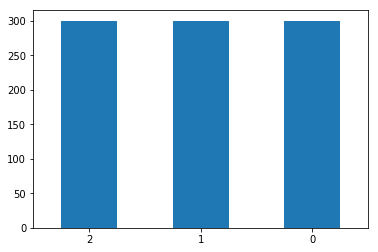

In [53]:
X_train_df['class'].value_counts().plot(kind="bar", rot=0)

In [54]:
# 0: 3C
# 1: Cosmetics
# 2: Food
X_train_df.loc[X_train_df['class'] == 1].tail()

,comments,class
595,這幾週都放假休息了 11月開始有些公開活動能讓大家探班囉??? - 然後趁著休假又來星采體驗新療程了?? 登登登登就是?海藻煥膚療程? 先清潔之後用海藻做臉部按摩 有種用泥土塗臉的樣子哈哈太醜就不放了 臉部會感覺刺刺的卸除海藻泥之後 觸碰臉部也還是會有刺刺的感覺都是正常的??‍♀️ 一天之內這種感覺就會好了?? 做完之後有種被海藻嚕臉去角質磨皮的感覺 皮膚變超滑還很亮白覺得很有感很喜歡?✌...,1
596,用 Visée Taiwan 上秋妝? 還有時尚百變唇膏十色全試色唷? 看影片去? 這邊買 #visee #清透裸粧粉底液 #煥光綻色氣墊眼彩棒 #時尚百變唇膏,1
597,「近3成SPA美容業者 廣告涉及宣稱療效」直播現場 本會於今年3月受理受害消費者李小姐的書面申訴，消費者於105年6月向業者購買10次的美容課程，消費者已使用了3堂課，但因私人因素而欲申請退還剩餘未使用的7堂課的費用，共計10500元。豈料，業者竟說消費者是購買去角質的產品，單據載明「x10」係指該產品可以使用10次，並不是說購買了10堂的課程。且既然該產品已經拆封就不得退還費用，消費者仍...,1
598,? 粉底遮瑕專家 ? COVERMARK ⭐COVERMARK鑽石光無瑕粉霜 給你鑽石光 ➡ 只需輕輕一抹，肌膚宛如的霜狀粉底 ? 按讚+分享+留言「@_____，打造奢華水感無瑕美肌就靠___了。」(留言品牌名) ? 抽獎獎項 ? COVERMARK水漾鑽石粉霜體驗禮 (水漾嫩肌鑽石光無瑕粉霜0.6g (指定色)+水漾限量攜帶式蜜粉3g +柔紗潤澤隔離霜體驗包1.5g)，2名 ⚠ 11/...,1
599,(健康醫療網／記者吳珮均報導) 過去女性在化眼妝時，僅能藉由眼線、眼影，接著再刷上一層層濃厚睫毛膏或是戴上假睫毛，才能製造出放電有神大眼。而隨著時代變遷，越來越多女生選擇以嫁接睫毛的方式，讓雙眼看起來明亮且有神，其不僅可選擇適合自己的濃密以及纖長度睫毛，同時也能省去每天上妝時間；但是在嫁接睫毛前，有什麼應注意的呢？ 順應潮流趨勢 山茶花自然濃密技術成指標 推陳出新在美容產業早已不是新奇的現...,1


In [55]:
X_train_comments = list(X_train_df["comments"])
Y_train = list(X_train_df["class"])
X_train_comments = [ i.strip().replace("，"," ").replace(" "," ").replace("\n","").replace("\r","") for i in X_train_comments ]

In [56]:
except_file = open("dict/hippo_exception_word.txt", encoding='utf-8')
exception = except_file.read().split(',')
exception.append(" ")

def segmentWord(text):
    punct = set(u''':!),.:;?]}$¢'"、。〉》」』】〕〗〞︰︱︳﹐､﹒﹔﹕﹖﹗﹚﹜﹞！），．：；？｜｝︴︶︸︺︼︾﹀﹂﹄﹏､～￠々‖•·ˇˉ―--′’”([{£¥'"‵〈《「『【〔〖（［｛￡￥〝︵︷︹︻︽︿﹁﹃﹙﹛﹝（｛“‘-—_…''')
    punct |= set(exception)
    words = [word for word in jieba.cut(text, cut_all=True) if (len(word.strip()) >= 2) and (word not in stopwords) and ( not any(ext in word for ext in punct) )]
    return " ".join(words)

In [57]:
x_train_raw = []
x_train_raw_backup = []
Y_train_backup = []

t1 = time.time()
for x in tqdm(X_train_comments):
    x_train_raw.append(segmentWord(x))
t2 = time.time()
tm_cost = t2-t1
print('time cost: {}'.format(tm_cost))
print('speed %s bytes/second' % (len(X_train_comments)/tm_cost))

  0%|                                                            | 0/900 [00:00<?, ?it/s]Building prefix dict from D:\Programming\Python\課程教學\David Python 教育訓練\dict\dict.big.txt ...
Loading model from cache C:\Users\princ\AppData\Local\Temp\jieba.u9fe11b2227c896c5bbad65bb17730314.cache
Loading model cost 1.404 seconds.
Prefix dict has been built succesfully.
100%|█████████████████████████████████████████████████| 900/900 [00:05<00:00, 168.28it/s]


time cost: 5.354348659515381
speed 168.0876717657491 bytes/second


In [58]:
# 先將語料 list 轉置為DataFrame再使用map的方式回傳
_X_train_comments = pd.DataFrame(X_train_comments, columns=["comment"])

t1 = time.time()
_X_train_comments['comment_jieba'] = list(map(segmentWord, _X_train_comments['comment']))
t2 = time.time()
tm_cost = t2-t1
print('time cost: {}'.format(tm_cost))
print('speed %s bytes/second' % (len(_X_train_comments)/tm_cost))

time cost: 3.975383996963501
speed 226.39322407280474 bytes/second


In [59]:
x_train_raw = list(_X_train_comments['comment_jieba'])
x_train_raw[:1]

['安安 回來 更新 主要 要用 素材 呂布 工具 無限 無限期 限期 放棄 棄學 PR 慣例 上個 一次 封面 材料 六代 桌布 八代 角色 官方 方便 全程 魔術 選區 呂布 PS4 pro 影片 1080p 但因 緣故 拉伸 畫質 成品 1080p 依然 沒救 目前 拉伸 影片 之間 徘徊 傷腦筋 腦筋 有用 一些 五毛 五毛錢 毛錢 特效 別介 別介意 介意 調色 PR 那種 渲染 圖層 功能 直接 達到 片段 色彩 校正 效果 影片 是因為 昨天 天才 呂布 正史 打完 享受 途中 呂布 陳宮 談戀愛 戀愛 素材 DL 表示 USB 表示 表示 沒用 DL 357 呂布 IF 最終 結局 1080P 通天 真三國 三國 無雙 猛將 猛將傳 呂布 IF 路線 貂蟬 償還 劉備 援助 擊退 曹操 357 戰呂布 呂布 DL 357 呂布 正史 結局 357 出場 358 呂布 結局 358 陳宮 結局 USB 帶來 戰禍 之人 濮陽 曹操 屁股 上馬 DL 720 三國 無雙 猛將 猛將傳 呂布 事件 大河 奔騰 陳宮 張遼 DL 猛將 猛將傳 opDL 1080 三國 無雙 猛將 猛將傳 呂布 事件 難忘 之人 貂蟬 陳宮 黨爭 歌詞 作筆記 筆記 作詞 作曲 蒙今 今夜 特別 漫長 號碼 存放 放下 陳宮 初見 呂布 源自 某種 倔強 刪去 不敢 陳宮 呂布 聽明 明明 念念 念念不忘 思前想後 愈發 發緊 緊張 陳宮 呂布 無法 深藏 難忘 之人 黨爭 呂布 深情 陳宮 阻止 鬼迷心竅 心竅 陳宮 下跪 敷衍 太多 不難 難過 呂布 拒絕 勸諫 陳宮 失落 親口說 口說 沉默 陳宮 初見 陳宮 重逢 陳宮 勸諫 ok 陳宮 陳宮 結局 早就 回答 難忘 之人 貂蟬 呂布 重逢 不可 可得 最難 呂布 結局 飛馬 呂布 亮度 陳宮 失落 陳宮 結局 自好 好好 貂蟬 呂布 自作 自作多情 多情 陳宮 正史 結局 失落 至少 換來 釋懷 灑脫 丟失 失掉 自我 357 陳宮 一瞬 瞬間 陳宮 初見 呂布 目送 呂布 離去 憧憬 表情']

In [60]:
# remove none valid list by key
for i,x in enumerate(x_train_raw):
    if len(x.strip())==0:
        del x_train_raw[i]
        del Y_train[i]

In [61]:
Y_train = np.array(Y_train)

In [62]:
assert len(x_train_raw) == len(Y_train)

In [63]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer(max_df=0.3,  min_df=0.001)
transformer = TfidfTransformer()
corpus = x_train_raw
X = vectorizer.fit_transform(corpus)
# 使用tf-idf方法找出代表性的詞彙，並給予權重
tfidf = transformer.fit_transform(X)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(tfidf, Y_train, test_size=0.2, random_state=42)

# 使用naive bayes進行分類
mlt = MultinomialNB(alpha=1.0)
mlt.fit(x_train,y_train)
y_predict = mlt.predict(x_test)

print("預測的文章類別為：\n", y_predict)
print("準確率：", mlt.score(x_test, y_test))

預測的文章類別為：
 [2 2 0 1 0 2 0 0 0 0 0 1 2 0 2 1 0 1 1 1 0 2 2 1 1 1 0 2 2 1 0 2 0 1 2 2 0
 1 1 0 0 0 1 2 2 2 0 1 1 2 1 1 1 0 0 0 0 1 1 1 0 1 2 1 0 0 2 1 1 1 2 1 2 1
 0 2 1 1 0 2 1 0 1 0 2 2 1 1 0 1 1 1 2 2 2 1 0 0 2 2 1 1 1 1 2 0 2 0 2 0 2
 2 2 1 2 2 2 2 0 2 1 0 2 1 2 0 0 2 1 0 1 2 1 0 2 0 2 2 1 0 0 0 2 1 2 0 2 0
 1 0 0 2 1 1 1 0 0 1 1 0 1 2 2 1 1 1 0 0 2 1 1 1 0 1 1 2 1 2 0 0]
準確率： 0.9777777777777777


#### tips
訓練集的誤差大(詞彙並沒有精準的反應文章主題)，預測效果也會低落<br>
使用naive bayes算法不需進行調參<br>

#### 優缺點
##### 優點
其模型發源於古典數學理論，有較穩定的分類效率<br>
對缺失數據不太敏感，算法也比較簡單易懂，常用於文本分類<br>
文章中缺少某部分句子影響文意，也不會造成太大影響<br>
分類準確度高，速度快<br>
##### 缺點
由於使用了樣本屬性皆獨立的假設，所以如果樣本屬性有關聯時其效果不好<br>
文章當中具代表性詞彙彼此之間是沒有關係的(假設)<br>
由於是在訓練集當中進行統計詞頻，要是使用含有多樣性內容的文章做訓練集就會對預測造成干擾<br>
挑選類別準確性或代表性較強的文章作為訓練集<br>

In [65]:
content_string = "✨石澤研究所 毛穴撫子10周年✨【角質對策洗顏粉】日本暢銷10年，得獎無數，也是日本女孩們對抗毛孔問題的首選品牌❤️有黑頭粉刺、老廢角質問題的你，還在等甚麼呢?"
x_naive_bayes = transformer.transform(vectorizer.transform([segmentWord(content_string)]))
pred_naive_bayes = mlt.predict_proba(x_naive_bayes)
print(pred_naive_bayes)

[[0.11971035 0.70823803 0.17205162]]


In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = mlt.predict(transformer.fit_transform(x_test))

### Accuracy
The first metric we are going to discuss is, perhaps, the simplest one, the accuracy. It answers the question:<br>
"How often is the classifier correct?"

<div>
    <img src="images/accuracy.png">
</div>

In [67]:
print("accuracy: {}".format(accuracy_score(y_test, y_pred)))

accuracy: 0.9722222222222222


### Confusion matrix

The confusion matrix is another metric that is often used to measure the performance of a classification algorithm. True to its name, the terminology related to the confusion matrix can be rather confusing, but the matrix itself is simple to understand.

|          | 實際為 Yes      | 實際為 No       |
|:--------:|:---------------:|:---------------:|
| 預測 Yes | True Positive  |  False Positive   |
| 預測 No  | False Negative |  True Negative    |

- True positives (TP): the cases for which the classifier predicted ‘category’ and the post were the target category.
- True negatives (TN): the cases for which the classifier predicted ‘not’ and the emails were not the target category.
- False positives (FP): the cases for which the classifier predicted ‘category’ but the post were not the target category.
- False negatives (FN): the cases for which the classifier predicted ‘not’ but the emails were actually the target category.

我們把所有正確的情況，也就是True Positive和True Negative，把它加總起來除上所有情形個數，那就是Accuracy，這也是最常用的指標，但是在某些情形下這個指標會失效，如果今天實際正向的例句很少，譬如有一個聊天機器人和10000個人長談，藉由談話，機器人會預測這些人未來會不會當上CEO，那我只要簡單一步來設計我的模型就可以使它Accuracy達到99%以上，那就是通通預測你不會當上CEO就好了，顯然我們需要別種指標，如 Confusion matrix 來應對這種情況。


<div>
    <img src="images/mechine_learning_measure.png">
</div>

In [68]:
print("confusion matrix:")
print(confusion_matrix(y_test, y_pred))

# Let's interpret these results.
# Out of the 57+1+2 actual instances of ‘3C’ (first row), the classifier predicted correctly 57 of them.
# Out of the 0+65+2 actual instances of ‘Cosmetics’ (second row), the classifier predicted correctly 65 of them.
# Out of all 0+0+53 actual instances of ‘Food’ (third row), the classifier predicted correctly 53 of them.

confusion matrix:
[[57  1  2]
 [ 0 65  2]
 [ 0  0 53]]


<div>
    <img src="images/accuracy_cm.png">
</div>

### Precision, recall and f1-score

Besides the accuracy, there are several other performance measures which can be computed from the confusion matrix. Some of the main ones are obtained using the function classification_report:

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        60
           1       0.98      0.97      0.98        67
           2       0.93      1.00      0.96        53

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180



### Save Naive Bayes (larger data set) model

In [70]:
import pickle
with open('model/NaiveBayes/lesson08/model_cat_naive_bayes_MultinomialNB_vectorizer.pkl', 'wb') as handle:
    pickle.dump(vectorizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('model/NaiveBayes/lesson08/model_cat_naive_bayes_MultinomialNB_transformer.pkl', 'wb') as handle:
    pickle.dump(transformer, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('model/NaiveBayes/lesson08/model_cat_naive_bayes_MultinomialNB_mlt.pkl', 'wb') as handle:
    pickle.dump(mlt, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Load Naive Bayes (larger data set) model

In [71]:
import pickle
with open('model/NaiveBayes/lesson08/model_cat_naive_bayes_MultinomialNB_vectorizer.pkl', 'rb') as handle:
    naive_bayes_vectorizer = pickle.load(handle)
with open('model/NaiveBayes/lesson08/model_cat_naive_bayes_MultinomialNB_transformer.pkl', 'rb') as handle:
    naive_bayes_transformer = pickle.load(handle)
with open('model/NaiveBayes/lesson08/model_cat_naive_bayes_MultinomialNB_mlt.pkl', 'rb') as handle:
    naive_bayes_mlt = pickle.load(handle)

In [72]:
class_label = {
    0:'3C',
    1:'Cosmetics',
    2:'Food'
}

def predict_naive_bayes_mlt(transformer, vectorizer, clf, stopwords, exception, content_string):
    x_naive_bayes = transformer.transform(vectorizer.transform([segmentWord(content_string)]))
    pred_naive_bayes = clf.predict_proba(x_naive_bayes)
    top3 = pred_naive_bayes[0].argsort()[-3:][::-1]
    ps = []
    for i in top3:
        ps.append({class_label[i]:pred_naive_bayes[0,i]})
    return pred_naive_bayes.argmax(), class_label[pred_naive_bayes.argmax()], ps, content_string

In [73]:
s = "新年直接進入工商主題！ 一樣可以又拉又放～《三國大戰Smash！》 有很多性感辣妹、帥氣型男（漂亮的武將立繪）這點我就給過 簡單爽快的對戰！還能跟朋友或其他玩家一起玩～ 下載連結：http://bit.ly/2Aa9vWl 三國大戰"
res = predict_naive_bayes_mlt(naive_bayes_transformer, naive_bayes_vectorizer, naive_bayes_mlt, stopwords, exception, s)
print(res)

s = "一直想把部分自己很喜歡的台南美食店家做個小整理，分享給大家。不過台南好吃東西實在太多，這篇集合了130家台南美食的懶人包也只是露出大冰山的一小小小角而已，但幾乎都是Mimi訪過3次以上的愛店，雖然不敢說是這些是啥咪台南必吃美食（沒有必吃不必吃，只有想吃不想吃）"
res = predict_naive_bayes_mlt(naive_bayes_transformer, naive_bayes_vectorizer, naive_bayes_mlt, stopwords, exception, s)
print(res)

s = "這款是半透明凝凍狀的質地，我覺得擦起來很清爽、又好吸收，沒有特殊的味道，不會有浮在肌膚表層進不去的感覺 (最近試用幾款都浮浮又悶，才讓我有了比較)，我都在保養最後一道使用這款凝凍，再視情況看想不想用荳蔻晚安粉，就算不用荳蔻晚安粉也不會讓我感到不適，隔天早上用清水洗臉，肌膚也不會有乾巴巴的感覺，會帶有保濕度，我覺得很棒!"
res = predict_naive_bayes_mlt(naive_bayes_transformer, naive_bayes_vectorizer, naive_bayes_mlt, stopwords, exception, s)
print(res)

(0, '3C', [{'3C': 0.4996397025435317}, {'Food': 0.2591125509331484}, {'Cosmetics': 0.24124774652332054}], '新年直接進入工商主題！ 一樣可以又拉又放～《三國大戰Smash！》 有很多性感辣妹、帥氣型男（漂亮的武將立繪）這點我就給過 簡單爽快的對戰！還能跟朋友或其他玩家一起玩～ 下載連結：http://bit.ly/2Aa9vWl 三國大戰')
(2, 'Food', [{'Food': 0.7213338959962559}, {'3C': 0.15364254504655822}, {'Cosmetics': 0.12502355895718256}], '一直想把部分自己很喜歡的台南美食店家做個小整理，分享給大家。不過台南好吃東西實在太多，這篇集合了130家台南美食的懶人包也只是露出大冰山的一小小小角而已，但幾乎都是Mimi訪過3次以上的愛店，雖然不敢說是這些是啥咪台南必吃美食（沒有必吃不必吃，只有想吃不想吃）')
(1, 'Cosmetics', [{'Cosmetics': 0.7742294456627926}, {'Food': 0.12233817729870491}, {'3C': 0.10343237703850174}], '這款是半透明凝凍狀的質地，我覺得擦起來很清爽、又好吸收，沒有特殊的味道，不會有浮在肌膚表層進不去的感覺 (最近試用幾款都浮浮又悶，才讓我有了比較)，我都在保養最後一道使用這款凝凍，再視情況看想不想用荳蔻晚安粉，就算不用荳蔻晚安粉也不會讓我感到不適，隔天早上用清水洗臉，肌膚也不會有乾巴巴的感覺，會帶有保濕度，我覺得很棒!')


<a id="Text-Classification-With-XGBoost"></a>
## Text Classification With XGBoost 三個分類：3C、美妝、美食

* XGBoost（eXtreme Gradient Boosting）*是梯度增強算法（GBM）的高級實現。 由於我在之前的文章 Complete Guide to Parameter Tuning in Gradient Boosting (GBM) in Python中詳細介紹了Gradient Boosting Machine，所以強烈建議您先閱讀本文。 這將有助於您加強對GBM的一般升級和參數調優的理解。

在一個預測型的模型中XGBoost這種演算法加入了提升（boosting）的能力。當大衛探索它的表現性能以及高準確性背後的科學道路時，發現了它身上有諸多的優點：

- 正則化：
標準的GBM實現過程中沒有像XGBoost一樣擁有正規化，因此XGBoost也有助於減少過度擬合。
事實上，XGBoost也被稱爲“正規化提升”技術。
- 平行處理：
XGBoost實現了並行處理，與GBM相比，速度驚人的快。
我們知道提升（boosting）是一個順序也就是串行的過程，XGBoost是怎樣並行化的呢？ 注意xgboost的並行不是tree粒度的並行，xgboost也是一次迭代完才能進行下一次迭代的（第t次迭代的代價函數裏包含了前面t-1次迭代的預測值）。xgboost的並行是在特徵粒度上的。我們知道，決策樹的學習最耗時的一個步驟就是對特徵的值進行排序（因爲要確定最佳分割點），xgboost在訓練之前，預先對數據進行了排序，然後保存爲block結構，後面的迭代中重複地使用這個結構，大大減小計算量。這個block結構也使得並行成爲了可能，在進行節點的分裂時，需要計算每個特徵的增益，最終選增益最大的那個特徵去做分裂，那麼各個特徵的增益計算就可以開多線程進行。 
可並行的近似直方圖算法。樹節點在進行分裂時，我們需要計算每個特徵的每個分割點對應的增益，即用貪心法枚舉所有可能的分割點。當數據無法一次載入內存或者在分佈式情況下，貪心算法效率就會變得很低，所以xgboost還提出了一種可並行的近似直方圖算法，用於高效地生成候選的分割點。 我希望你得到我來的地方。查看這個鏈接，進一步探索。
XGBoost還支持在Hadoop上實現。
- 高度的靈活性
XGBoost允許用戶自定義優化目標以及評估的準則。
這就爲模型的廣泛性應用提供了無限的可能，有沒有感受到‘爲所欲爲’。
- 資料缺失值處理
XGBoost具有內置的規則來處理缺失的值，它可以自動學習出它的分裂方向。
- 剪枝
GBM在遇到損失爲負的分裂節點時會停止這個節點的繼續分裂， 因此，它更像是一種貪心的算法。
另一方面，當我們指定樹的最大深度（max_depth）時，XGBoost就會以這個指定的最大樹深爲上限去剪枝。具體來說就是，XGBoost先從上到下建立出所有可能的子樹，然後根據我們設定的max_depth，從下到上反向進行剪枝，並且也會移除負增益的分割樹。
當我們遇到一個比如說爲-2的負損失分裂點然後它後面又跟着一個爲+10的正損失的分裂時， GBM將在遇到-2時停止，而XGBoost將會繼續深入分割，並且會看到一個組合出來爲+8的分裂效果。
- 內置交叉驗證
XGBoost允許使用者在每一輪 boosting 過程中的每次迭代中使用交叉驗證，因此很容易獲得最優boosting迭代次數；

GBM必須使用網路搜尋，因此只能測試有限個值。在之前存在的模型上繼續訓練，開發者可以從上次運行的最後一次迭代開始訓練XGBoost模型。這在特定的應用中優勢還是比較明顯的。GBM在sklearn的實現中也有這個特點。

In [74]:
import numpy as np
import pandas as pd
import jieba
import time
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

jieba.initialize()
jieba.set_dictionary("dict/dict.big.txt")

### Load data set

In [75]:
file = open("data/classification/1game_2beauty_3food_small.csv", "r", encoding="utf-8")
file_list = []
for j in file:
    j = j.split("｜")
    file_list.append([j[1].strip(), int(j[0])-1])
X_train_df = pd.DataFrame(file_list, columns=["comments", "class"])
X_train_df.tail()

,comments,class
895,我還記得以前滿愛千葉，常常去都要排隊不但店面大間、裝潢氣派，只要300多元就能吃到飽，根本CP值超高！不知道什麼時候就回不去了，現在吃火鍋也完全不會考慮千葉… (圖/翻攝自網路)前一陣子 批踢踢 就有鄉民PO文，說因為學生證299活動去吃八德的千葉。現切的肉油的部分佔肉三分之二，吃了有夠噁心，肉也沒很嫩。幫忙切的員工臉也很臭，蝦子的部分快跟三媽一樣小，整趟之下來最好吃的是 蛋糕 …讓他不禁...,2
896,哪尼？咖啡廳要價兩三百起跳的 #抹茶舒芙蕾 竟然在家就能用平底鍋輕易料理？ 完全是現學現賺啊！快點來試試吧 ?▼你還會想看 ▼ 雪花涼糕 >> 日式戚風 >> 鮮奶油蛋糕 >> 斑馬紋戚風 >> Dolce甜蜜生活手作甜點 - 看更多邪惡美食： Instagram： - #Yahoo小當家 擴大招募影音美食家！想讓你的料理散佈至世界各個角落嗎？歡迎成為我們的創作夥伴，分享你的精彩料...,2
897,【泰好味烤魚?】 天寒地凍想食熱辣辣嘅嘢？不如試下泰式烤魚！呢間泰國過江龍Café走新派路線，最近元朗店就推出分店限定嘅泰式烤魚，香茅椰青雞湯底同椰青冬蔭功湯底呢兩款仲會連埋原個椰青奉上。總共六款口味有辣有唔辣，點烤魚仲有指定酒類飲品買一送一優惠呀～Mango Tree Café 網址: : 元朗朗日路9號形點一期1樓1035號舖========================== 11...,2
898,【台北尋找愛麗絲】 有無人好鐘意愛麗斯夢遊仙境呢個童話？台北呢間餐廳以愛麗斯為主題，行入去直程好似行咗入童話世界咁啊！另外食物方面質素都唔錯，甜品仲有得畫埋花，啱哂用嚟打卡～去之前記得先用Openrice訂座咁就唔怕要等位啦：來自愛麗絲 網址: : 區111號2樓圖：eatingismylove、vanillayee、Cathyhui1214、yuyen2002 ============...,2
899,小資族有福了??? 中式套餐現在只要320元!?? 現場換咖啡半價只要50元呢!? 餐廳內的擺設都是老闆的用心? 料理都是現點現做，耐心等候~? 歡迎來吃飯 放鬆一下~?,2


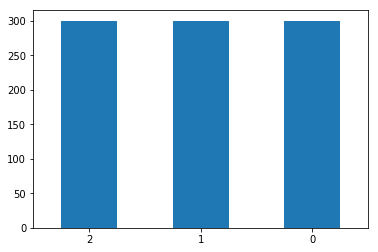

In [76]:
X_train_df['class'].value_counts().plot(kind="bar", rot=0)

In [77]:
# 0: 3C
# 1: Cosmetics
# 2: Food
X_train_df.loc[X_train_df['class'] == 1].tail()

,comments,class
595,這幾週都放假休息了 11月開始有些公開活動能讓大家探班囉??? - 然後趁著休假又來星采體驗新療程了?? 登登登登就是?海藻煥膚療程? 先清潔之後用海藻做臉部按摩 有種用泥土塗臉的樣子哈哈太醜就不放了 臉部會感覺刺刺的卸除海藻泥之後 觸碰臉部也還是會有刺刺的感覺都是正常的??‍♀️ 一天之內這種感覺就會好了?? 做完之後有種被海藻嚕臉去角質磨皮的感覺 皮膚變超滑還很亮白覺得很有感很喜歡?✌...,1
596,用 Visée Taiwan 上秋妝? 還有時尚百變唇膏十色全試色唷? 看影片去? 這邊買 #visee #清透裸粧粉底液 #煥光綻色氣墊眼彩棒 #時尚百變唇膏,1
597,「近3成SPA美容業者 廣告涉及宣稱療效」直播現場 本會於今年3月受理受害消費者李小姐的書面申訴，消費者於105年6月向業者購買10次的美容課程，消費者已使用了3堂課，但因私人因素而欲申請退還剩餘未使用的7堂課的費用，共計10500元。豈料，業者竟說消費者是購買去角質的產品，單據載明「x10」係指該產品可以使用10次，並不是說購買了10堂的課程。且既然該產品已經拆封就不得退還費用，消費者仍...,1
598,? 粉底遮瑕專家 ? COVERMARK ⭐COVERMARK鑽石光無瑕粉霜 給你鑽石光 ➡ 只需輕輕一抹，肌膚宛如的霜狀粉底 ? 按讚+分享+留言「@_____，打造奢華水感無瑕美肌就靠___了。」(留言品牌名) ? 抽獎獎項 ? COVERMARK水漾鑽石粉霜體驗禮 (水漾嫩肌鑽石光無瑕粉霜0.6g (指定色)+水漾限量攜帶式蜜粉3g +柔紗潤澤隔離霜體驗包1.5g)，2名 ⚠ 11/...,1
599,(健康醫療網／記者吳珮均報導) 過去女性在化眼妝時，僅能藉由眼線、眼影，接著再刷上一層層濃厚睫毛膏或是戴上假睫毛，才能製造出放電有神大眼。而隨著時代變遷，越來越多女生選擇以嫁接睫毛的方式，讓雙眼看起來明亮且有神，其不僅可選擇適合自己的濃密以及纖長度睫毛，同時也能省去每天上妝時間；但是在嫁接睫毛前，有什麼應注意的呢？ 順應潮流趨勢 山茶花自然濃密技術成指標 推陳出新在美容產業早已不是新奇的現...,1


In [78]:
X_train_comments = list(X_train_df["comments"])
Y_train = list(X_train_df["class"])
X_train_comments = [ i.replace("，"," ").replace(" "," ").replace("\n","").replace("\r","") for i in X_train_comments ]

In [79]:
except_file = open("dict/hippo_exception_word.txt", encoding='utf-8')
exception = except_file.read().split(',')
exception.append(" ")

def segmentWord(text):
    punct = set(u''':!),.:;?]}$¢'"、。〉》」』】〕〗〞︰︱︳﹐､﹒﹔﹕﹖﹗﹚﹜﹞！），．：；？｜｝︴︶︸︺︼︾﹀﹂﹄﹏､～￠々‖•·ˇˉ―--′’”([{£¥'"‵〈《「『【〔〖（［｛￡￥〝︵︷︹︻︽︿﹁﹃﹙﹛﹝（｛“‘-—_…''')
    punct |= set(exception)
    words = [word for word in jieba.cut(text, cut_all=True) if (len(word.strip()) >= 2) and (word not in stopwords) and ( not any(ext in word for ext in punct) )]
    return " ".join(words)

In [80]:
x_train_raw = []
x_train_raw_backup = []
Y_train_backup = []

t1 = time.time()
for x in tqdm(X_train_comments):
    x_train_raw.append(segmentWord(x))
t2 = time.time()
tm_cost = t2-t1
print('time cost: {}'.format(tm_cost))
print('speed %s bytes/second' % (len(X_train_comments)/tm_cost))

  0%|                                                            | 0/900 [00:00<?, ?it/s]Building prefix dict from D:\Programming\Python\課程教學\David Python 教育訓練\dict\dict.big.txt ...
Loading model from cache C:\Users\princ\AppData\Local\Temp\jieba.u9fe11b2227c896c5bbad65bb17730314.cache
Loading model cost 1.676 seconds.
Prefix dict has been built succesfully.
100%|█████████████████████████████████████████████████| 900/900 [00:05<00:00, 170.48it/s]


time cost: 5.284097194671631
speed 170.32237804170984 bytes/second


In [81]:
# 先將語料 list 轉置為DataFrame再使用map的方式回傳
_X_train_comments = pd.DataFrame(X_train_comments, columns=["comment"])

t1 = time.time()
_X_train_comments['comment_jieba'] = list(map(segmentWord, _X_train_comments['comment']))
t2 = time.time()
tm_cost = t2-t1
print('time cost: {}'.format(tm_cost))
print('speed %s bytes/second' % (len(_X_train_comments)/tm_cost))

time cost: 3.509092092514038
speed 256.47659744239087 bytes/second


In [82]:
x_train_raw = list(_X_train_comments['comment_jieba'])
x_train_raw[:1]

['安安 回來 更新 主要 要用 素材 呂布 工具 無限 無限期 限期 放棄 棄學 PR 慣例 上個 一次 封面 材料 六代 桌布 八代 角色 官方 方便 全程 魔術 選區 呂布 PS4 pro 影片 1080p 但因 緣故 拉伸 畫質 成品 1080p 依然 沒救 目前 拉伸 影片 之間 徘徊 傷腦筋 腦筋 有用 一些 五毛 五毛錢 毛錢 特效 別介 別介意 介意 調色 PR 那種 渲染 圖層 功能 直接 達到 片段 色彩 校正 效果 影片 是因為 昨天 天才 呂布 正史 打完 享受 途中 呂布 陳宮 談戀愛 戀愛 素材 DL 表示 USB 表示 表示 沒用 DL 357 呂布 IF 最終 結局 1080P 通天 真三國 三國 無雙 猛將 猛將傳 呂布 IF 路線 貂蟬 償還 劉備 援助 擊退 曹操 357 戰呂布 呂布 DL 357 呂布 正史 結局 357 出場 358 呂布 結局 358 陳宮 結局 USB 帶來 戰禍 之人 濮陽 曹操 屁股 上馬 DL 720 三國 無雙 猛將 猛將傳 呂布 事件 大河 奔騰 陳宮 張遼 DL 猛將 猛將傳 opDL 1080 三國 無雙 猛將 猛將傳 呂布 事件 難忘 之人 貂蟬 陳宮 黨爭 歌詞 作筆記 筆記 作詞 作曲 蒙今 今夜 特別 漫長 號碼 存放 放下 陳宮 初見 呂布 源自 某種 倔強 刪去 不敢 陳宮 呂布 聽明 明明 念念 念念不忘 思前想後 愈發 發緊 緊張 陳宮 呂布 無法 深藏 難忘 之人 黨爭 呂布 深情 陳宮 阻止 鬼迷心竅 心竅 陳宮 下跪 敷衍 太多 不難 難過 呂布 拒絕 勸諫 陳宮 失落 親口說 口說 沉默 陳宮 初見 陳宮 重逢 陳宮 勸諫 ok 陳宮 陳宮 結局 早就 回答 難忘 之人 貂蟬 呂布 重逢 不可 可得 最難 呂布 結局 飛馬 呂布 亮度 陳宮 失落 陳宮 結局 自好 好好 貂蟬 呂布 自作 自作多情 多情 陳宮 正史 結局 失落 至少 換來 釋懷 灑脫 丟失 失掉 自我 357 陳宮 一瞬 瞬間 陳宮 初見 呂布 目送 呂布 離去 憧憬 表情']

In [83]:
# remove none valid list by key
for i,x in enumerate(x_train_raw):
    if len(x.strip())==0:
        del x_train_raw[i]
        del Y_train[i]

In [84]:
assert len(x_train_raw) == len(Y_train)

In [85]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [86]:
vectorizer = CountVectorizer(max_df=0.3,  min_df=0.001)
transformer = TfidfTransformer()
corpus = x_train_raw
X = vectorizer.fit_transform(corpus)
tfidf = transformer.fit_transform(X)

In [87]:
_x_train, _x_val, _y_train, _y_val = train_test_split(tfidf, Y_train, test_size=0.2, random_state=42)

In [88]:
dtrain = xgb.DMatrix(_x_train, label=_y_train)
dtest = xgb.DMatrix(_x_val, label=_y_val)
params = {"num_class":3, "verbose_eval":True, "objective": "multi:softprob", "booster":"gbtree", 'max_depth':'5', 'eta':'0.01', 'subsample':'0.7', 'eval_metric':'mlogloss'}
params['nthread'] = 8   
#evallist  = [(dtest,'eval'), (dtrain,'train')]
evallist  = [(dtest,'eval')]
num_round = 4000
gbm_1 = xgb.train(params, dtrain, num_round, evals=evallist)

[0]	eval-mlogloss:1.08866
[1]	eval-mlogloss:1.0792
[2]	eval-mlogloss:1.06927
[3]	eval-mlogloss:1.06007
[4]	eval-mlogloss:1.05122
[5]	eval-mlogloss:1.04193
[6]	eval-mlogloss:1.03279
[7]	eval-mlogloss:1.02395
[8]	eval-mlogloss:1.01548
[9]	eval-mlogloss:1.00667
[10]	eval-mlogloss:0.997745
[11]	eval-mlogloss:0.989593
[12]	eval-mlogloss:0.981483
[13]	eval-mlogloss:0.973429
[14]	eval-mlogloss:0.965531
[15]	eval-mlogloss:0.958119
[16]	eval-mlogloss:0.950378
[17]	eval-mlogloss:0.94249
[18]	eval-mlogloss:0.935071
[19]	eval-mlogloss:0.927699
[20]	eval-mlogloss:0.920219
[21]	eval-mlogloss:0.912965
[22]	eval-mlogloss:0.90591
[23]	eval-mlogloss:0.898867
[24]	eval-mlogloss:0.891876
[25]	eval-mlogloss:0.884949
[26]	eval-mlogloss:0.878285
[27]	eval-mlogloss:0.871603
[28]	eval-mlogloss:0.865056
[29]	eval-mlogloss:0.858413
[30]	eval-mlogloss:0.851983
[31]	eval-mlogloss:0.845747
[32]	eval-mlogloss:0.839544
[33]	eval-mlogloss:0.833376
[34]	eval-mlogloss:0.827281
[35]	eval-mlogloss:0.821375
[36]	eval-mlogl

[288]	eval-mlogloss:0.280589
[289]	eval-mlogloss:0.279907
[290]	eval-mlogloss:0.279234
[291]	eval-mlogloss:0.278609
[292]	eval-mlogloss:0.278006
[293]	eval-mlogloss:0.277468
[294]	eval-mlogloss:0.276943
[295]	eval-mlogloss:0.276281
[296]	eval-mlogloss:0.275681
[297]	eval-mlogloss:0.275077
[298]	eval-mlogloss:0.274484
[299]	eval-mlogloss:0.27392
[300]	eval-mlogloss:0.273318
[301]	eval-mlogloss:0.272808
[302]	eval-mlogloss:0.272245
[303]	eval-mlogloss:0.271612
[304]	eval-mlogloss:0.270986
[305]	eval-mlogloss:0.27036
[306]	eval-mlogloss:0.269897
[307]	eval-mlogloss:0.269381
[308]	eval-mlogloss:0.26882
[309]	eval-mlogloss:0.268307
[310]	eval-mlogloss:0.267688
[311]	eval-mlogloss:0.267171
[312]	eval-mlogloss:0.266678
[313]	eval-mlogloss:0.266154
[314]	eval-mlogloss:0.265638
[315]	eval-mlogloss:0.265105
[316]	eval-mlogloss:0.264547
[317]	eval-mlogloss:0.26409
[318]	eval-mlogloss:0.263506
[319]	eval-mlogloss:0.263057
[320]	eval-mlogloss:0.262485
[321]	eval-mlogloss:0.261986
[322]	eval-mloglos

[572]	eval-mlogloss:0.189809
[573]	eval-mlogloss:0.189665
[574]	eval-mlogloss:0.189588
[575]	eval-mlogloss:0.189452
[576]	eval-mlogloss:0.189255
[577]	eval-mlogloss:0.189081
[578]	eval-mlogloss:0.188934
[579]	eval-mlogloss:0.188772
[580]	eval-mlogloss:0.188653
[581]	eval-mlogloss:0.188536
[582]	eval-mlogloss:0.188331
[583]	eval-mlogloss:0.188236
[584]	eval-mlogloss:0.188149
[585]	eval-mlogloss:0.188062
[586]	eval-mlogloss:0.18794
[587]	eval-mlogloss:0.187715
[588]	eval-mlogloss:0.187556
[589]	eval-mlogloss:0.187383
[590]	eval-mlogloss:0.187279
[591]	eval-mlogloss:0.187074
[592]	eval-mlogloss:0.187001
[593]	eval-mlogloss:0.186809
[594]	eval-mlogloss:0.186701
[595]	eval-mlogloss:0.186499
[596]	eval-mlogloss:0.186382
[597]	eval-mlogloss:0.186219
[598]	eval-mlogloss:0.186057
[599]	eval-mlogloss:0.185933
[600]	eval-mlogloss:0.185837
[601]	eval-mlogloss:0.185662
[602]	eval-mlogloss:0.185521
[603]	eval-mlogloss:0.185428
[604]	eval-mlogloss:0.185294
[605]	eval-mlogloss:0.185114
[606]	eval-mlog

[856]	eval-mlogloss:0.157957
[857]	eval-mlogloss:0.157881
[858]	eval-mlogloss:0.157841
[859]	eval-mlogloss:0.157711
[860]	eval-mlogloss:0.157671
[861]	eval-mlogloss:0.157631
[862]	eval-mlogloss:0.157561
[863]	eval-mlogloss:0.157501
[864]	eval-mlogloss:0.157453
[865]	eval-mlogloss:0.157404
[866]	eval-mlogloss:0.157325
[867]	eval-mlogloss:0.157273
[868]	eval-mlogloss:0.157278
[869]	eval-mlogloss:0.15712
[870]	eval-mlogloss:0.157033
[871]	eval-mlogloss:0.156975
[872]	eval-mlogloss:0.156884
[873]	eval-mlogloss:0.156788
[874]	eval-mlogloss:0.156709
[875]	eval-mlogloss:0.156677
[876]	eval-mlogloss:0.156578
[877]	eval-mlogloss:0.156493
[878]	eval-mlogloss:0.156409
[879]	eval-mlogloss:0.156346
[880]	eval-mlogloss:0.156233
[881]	eval-mlogloss:0.156116
[882]	eval-mlogloss:0.156054
[883]	eval-mlogloss:0.156014
[884]	eval-mlogloss:0.155886
[885]	eval-mlogloss:0.155847
[886]	eval-mlogloss:0.155815
[887]	eval-mlogloss:0.155728
[888]	eval-mlogloss:0.155701
[889]	eval-mlogloss:0.155649
[890]	eval-mlog

[1135]	eval-mlogloss:0.145676
[1136]	eval-mlogloss:0.145708
[1137]	eval-mlogloss:0.14572
[1138]	eval-mlogloss:0.145705
[1139]	eval-mlogloss:0.145718
[1140]	eval-mlogloss:0.145708
[1141]	eval-mlogloss:0.145684
[1142]	eval-mlogloss:0.145656
[1143]	eval-mlogloss:0.145638
[1144]	eval-mlogloss:0.145611
[1145]	eval-mlogloss:0.145569
[1146]	eval-mlogloss:0.145544
[1147]	eval-mlogloss:0.145507
[1148]	eval-mlogloss:0.145517
[1149]	eval-mlogloss:0.145519
[1150]	eval-mlogloss:0.145475
[1151]	eval-mlogloss:0.145463
[1152]	eval-mlogloss:0.145429
[1153]	eval-mlogloss:0.145406
[1154]	eval-mlogloss:0.145392
[1155]	eval-mlogloss:0.145424
[1156]	eval-mlogloss:0.145386
[1157]	eval-mlogloss:0.145388
[1158]	eval-mlogloss:0.145424
[1159]	eval-mlogloss:0.145422
[1160]	eval-mlogloss:0.145375
[1161]	eval-mlogloss:0.145349
[1162]	eval-mlogloss:0.145306
[1163]	eval-mlogloss:0.145305
[1164]	eval-mlogloss:0.145323
[1165]	eval-mlogloss:0.145307
[1166]	eval-mlogloss:0.145355
[1167]	eval-mlogloss:0.14539
[1168]	eval-

[1410]	eval-mlogloss:0.144171
[1411]	eval-mlogloss:0.144143
[1412]	eval-mlogloss:0.144156
[1413]	eval-mlogloss:0.144143
[1414]	eval-mlogloss:0.144135
[1415]	eval-mlogloss:0.14417
[1416]	eval-mlogloss:0.14418
[1417]	eval-mlogloss:0.144209
[1418]	eval-mlogloss:0.144199
[1419]	eval-mlogloss:0.144194
[1420]	eval-mlogloss:0.144186
[1421]	eval-mlogloss:0.144216
[1422]	eval-mlogloss:0.144227
[1423]	eval-mlogloss:0.144238
[1424]	eval-mlogloss:0.144234
[1425]	eval-mlogloss:0.144274
[1426]	eval-mlogloss:0.144258
[1427]	eval-mlogloss:0.144277
[1428]	eval-mlogloss:0.144292
[1429]	eval-mlogloss:0.144254
[1430]	eval-mlogloss:0.144239
[1431]	eval-mlogloss:0.14426
[1432]	eval-mlogloss:0.144222
[1433]	eval-mlogloss:0.144234
[1434]	eval-mlogloss:0.144227
[1435]	eval-mlogloss:0.14423
[1436]	eval-mlogloss:0.144253
[1437]	eval-mlogloss:0.14427
[1438]	eval-mlogloss:0.144247
[1439]	eval-mlogloss:0.144265
[1440]	eval-mlogloss:0.144279
[1441]	eval-mlogloss:0.144285
[1442]	eval-mlogloss:0.144326
[1443]	eval-mlo

[1684]	eval-mlogloss:0.143465
[1685]	eval-mlogloss:0.143484
[1686]	eval-mlogloss:0.143463
[1687]	eval-mlogloss:0.143463
[1688]	eval-mlogloss:0.143447
[1689]	eval-mlogloss:0.143481
[1690]	eval-mlogloss:0.143485
[1691]	eval-mlogloss:0.143512
[1692]	eval-mlogloss:0.143506
[1693]	eval-mlogloss:0.143503
[1694]	eval-mlogloss:0.143489
[1695]	eval-mlogloss:0.143479
[1696]	eval-mlogloss:0.143486
[1697]	eval-mlogloss:0.143503
[1698]	eval-mlogloss:0.143486
[1699]	eval-mlogloss:0.143483
[1700]	eval-mlogloss:0.143523
[1701]	eval-mlogloss:0.143519
[1702]	eval-mlogloss:0.143535
[1703]	eval-mlogloss:0.143513
[1704]	eval-mlogloss:0.143485
[1705]	eval-mlogloss:0.143476
[1706]	eval-mlogloss:0.143432
[1707]	eval-mlogloss:0.143418
[1708]	eval-mlogloss:0.143432
[1709]	eval-mlogloss:0.143429
[1710]	eval-mlogloss:0.143437
[1711]	eval-mlogloss:0.143445
[1712]	eval-mlogloss:0.143418
[1713]	eval-mlogloss:0.143435
[1714]	eval-mlogloss:0.143416
[1715]	eval-mlogloss:0.143419
[1716]	eval-mlogloss:0.143386
[1717]	eva

[1959]	eval-mlogloss:0.142775
[1960]	eval-mlogloss:0.142761
[1961]	eval-mlogloss:0.142762
[1962]	eval-mlogloss:0.142759
[1963]	eval-mlogloss:0.142763
[1964]	eval-mlogloss:0.142734
[1965]	eval-mlogloss:0.142739
[1966]	eval-mlogloss:0.142763
[1967]	eval-mlogloss:0.142761
[1968]	eval-mlogloss:0.14276
[1969]	eval-mlogloss:0.142778
[1970]	eval-mlogloss:0.142791
[1971]	eval-mlogloss:0.142794
[1972]	eval-mlogloss:0.142766
[1973]	eval-mlogloss:0.142795
[1974]	eval-mlogloss:0.142753
[1975]	eval-mlogloss:0.142774
[1976]	eval-mlogloss:0.142744
[1977]	eval-mlogloss:0.142718
[1978]	eval-mlogloss:0.142731
[1979]	eval-mlogloss:0.142743
[1980]	eval-mlogloss:0.142743
[1981]	eval-mlogloss:0.142729
[1982]	eval-mlogloss:0.142709
[1983]	eval-mlogloss:0.142677
[1984]	eval-mlogloss:0.142666
[1985]	eval-mlogloss:0.142694
[1986]	eval-mlogloss:0.142692
[1987]	eval-mlogloss:0.142677
[1988]	eval-mlogloss:0.142679
[1989]	eval-mlogloss:0.142676
[1990]	eval-mlogloss:0.142686
[1991]	eval-mlogloss:0.142691
[1992]	eval

[2233]	eval-mlogloss:0.142353
[2234]	eval-mlogloss:0.142355
[2235]	eval-mlogloss:0.142363
[2236]	eval-mlogloss:0.14236
[2237]	eval-mlogloss:0.14236
[2238]	eval-mlogloss:0.142366
[2239]	eval-mlogloss:0.142383
[2240]	eval-mlogloss:0.142399
[2241]	eval-mlogloss:0.142382
[2242]	eval-mlogloss:0.14238
[2243]	eval-mlogloss:0.142364
[2244]	eval-mlogloss:0.142345
[2245]	eval-mlogloss:0.142338
[2246]	eval-mlogloss:0.142336
[2247]	eval-mlogloss:0.14233
[2248]	eval-mlogloss:0.142315
[2249]	eval-mlogloss:0.142311
[2250]	eval-mlogloss:0.142309
[2251]	eval-mlogloss:0.142324
[2252]	eval-mlogloss:0.142315
[2253]	eval-mlogloss:0.142294
[2254]	eval-mlogloss:0.142308
[2255]	eval-mlogloss:0.142307
[2256]	eval-mlogloss:0.142305
[2257]	eval-mlogloss:0.142293
[2258]	eval-mlogloss:0.142273
[2259]	eval-mlogloss:0.142271
[2260]	eval-mlogloss:0.142281
[2261]	eval-mlogloss:0.142273
[2262]	eval-mlogloss:0.142269
[2263]	eval-mlogloss:0.142259
[2264]	eval-mlogloss:0.142266
[2265]	eval-mlogloss:0.142291
[2266]	eval-ml

[2507]	eval-mlogloss:0.14201
[2508]	eval-mlogloss:0.142014
[2509]	eval-mlogloss:0.142029
[2510]	eval-mlogloss:0.142031
[2511]	eval-mlogloss:0.142015
[2512]	eval-mlogloss:0.142021
[2513]	eval-mlogloss:0.14206
[2514]	eval-mlogloss:0.142076
[2515]	eval-mlogloss:0.142075
[2516]	eval-mlogloss:0.142088
[2517]	eval-mlogloss:0.142087
[2518]	eval-mlogloss:0.142103
[2519]	eval-mlogloss:0.142125
[2520]	eval-mlogloss:0.142101
[2521]	eval-mlogloss:0.142097
[2522]	eval-mlogloss:0.142101
[2523]	eval-mlogloss:0.1421
[2524]	eval-mlogloss:0.142097
[2525]	eval-mlogloss:0.142089
[2526]	eval-mlogloss:0.142089
[2527]	eval-mlogloss:0.142082
[2528]	eval-mlogloss:0.142086
[2529]	eval-mlogloss:0.142093
[2530]	eval-mlogloss:0.142074
[2531]	eval-mlogloss:0.142081
[2532]	eval-mlogloss:0.142072
[2533]	eval-mlogloss:0.142086
[2534]	eval-mlogloss:0.142072
[2535]	eval-mlogloss:0.142085
[2536]	eval-mlogloss:0.142096
[2537]	eval-mlogloss:0.142107
[2538]	eval-mlogloss:0.142085
[2539]	eval-mlogloss:0.142084
[2540]	eval-ml

[2782]	eval-mlogloss:0.142069
[2783]	eval-mlogloss:0.142053
[2784]	eval-mlogloss:0.142035
[2785]	eval-mlogloss:0.142035
[2786]	eval-mlogloss:0.142052
[2787]	eval-mlogloss:0.142048
[2788]	eval-mlogloss:0.142045
[2789]	eval-mlogloss:0.142054
[2790]	eval-mlogloss:0.142061
[2791]	eval-mlogloss:0.14204
[2792]	eval-mlogloss:0.142039
[2793]	eval-mlogloss:0.14205
[2794]	eval-mlogloss:0.142038
[2795]	eval-mlogloss:0.142044
[2796]	eval-mlogloss:0.142046
[2797]	eval-mlogloss:0.142043
[2798]	eval-mlogloss:0.142027
[2799]	eval-mlogloss:0.142021
[2800]	eval-mlogloss:0.142029
[2801]	eval-mlogloss:0.142032
[2802]	eval-mlogloss:0.142067
[2803]	eval-mlogloss:0.142068
[2804]	eval-mlogloss:0.142053
[2805]	eval-mlogloss:0.142053
[2806]	eval-mlogloss:0.142075
[2807]	eval-mlogloss:0.142064
[2808]	eval-mlogloss:0.142046
[2809]	eval-mlogloss:0.142027
[2810]	eval-mlogloss:0.142022
[2811]	eval-mlogloss:0.142034
[2812]	eval-mlogloss:0.142011
[2813]	eval-mlogloss:0.142018
[2814]	eval-mlogloss:0.141996
[2815]	eval-

[3056]	eval-mlogloss:0.141705
[3057]	eval-mlogloss:0.141704
[3058]	eval-mlogloss:0.141711
[3059]	eval-mlogloss:0.14171
[3060]	eval-mlogloss:0.141701
[3061]	eval-mlogloss:0.141689
[3062]	eval-mlogloss:0.141697
[3063]	eval-mlogloss:0.141699
[3064]	eval-mlogloss:0.14167
[3065]	eval-mlogloss:0.141671
[3066]	eval-mlogloss:0.141677
[3067]	eval-mlogloss:0.141668
[3068]	eval-mlogloss:0.141673
[3069]	eval-mlogloss:0.141667
[3070]	eval-mlogloss:0.14167
[3071]	eval-mlogloss:0.141672
[3072]	eval-mlogloss:0.141669
[3073]	eval-mlogloss:0.141678
[3074]	eval-mlogloss:0.141675
[3075]	eval-mlogloss:0.141672
[3076]	eval-mlogloss:0.141662
[3077]	eval-mlogloss:0.141645
[3078]	eval-mlogloss:0.141671
[3079]	eval-mlogloss:0.141671
[3080]	eval-mlogloss:0.141674
[3081]	eval-mlogloss:0.141675
[3082]	eval-mlogloss:0.141674
[3083]	eval-mlogloss:0.141664
[3084]	eval-mlogloss:0.141667
[3085]	eval-mlogloss:0.141686
[3086]	eval-mlogloss:0.141688
[3087]	eval-mlogloss:0.141711
[3088]	eval-mlogloss:0.141736
[3089]	eval-m

[3330]	eval-mlogloss:0.141531
[3331]	eval-mlogloss:0.141539
[3332]	eval-mlogloss:0.141534
[3333]	eval-mlogloss:0.141538
[3334]	eval-mlogloss:0.141558
[3335]	eval-mlogloss:0.141541
[3336]	eval-mlogloss:0.141536
[3337]	eval-mlogloss:0.14152
[3338]	eval-mlogloss:0.141501
[3339]	eval-mlogloss:0.141506
[3340]	eval-mlogloss:0.141517
[3341]	eval-mlogloss:0.141522
[3342]	eval-mlogloss:0.141529
[3343]	eval-mlogloss:0.141526
[3344]	eval-mlogloss:0.141531
[3345]	eval-mlogloss:0.141549
[3346]	eval-mlogloss:0.141539
[3347]	eval-mlogloss:0.141538
[3348]	eval-mlogloss:0.141525
[3349]	eval-mlogloss:0.141523
[3350]	eval-mlogloss:0.141519
[3351]	eval-mlogloss:0.141543
[3352]	eval-mlogloss:0.141555
[3353]	eval-mlogloss:0.141535
[3354]	eval-mlogloss:0.141532
[3355]	eval-mlogloss:0.141537
[3356]	eval-mlogloss:0.14154
[3357]	eval-mlogloss:0.141553
[3358]	eval-mlogloss:0.141557
[3359]	eval-mlogloss:0.141546
[3360]	eval-mlogloss:0.141563
[3361]	eval-mlogloss:0.141563
[3362]	eval-mlogloss:0.141549
[3363]	eval-

[3604]	eval-mlogloss:0.141366
[3605]	eval-mlogloss:0.141374
[3606]	eval-mlogloss:0.141394
[3607]	eval-mlogloss:0.14141
[3608]	eval-mlogloss:0.141431
[3609]	eval-mlogloss:0.141444
[3610]	eval-mlogloss:0.141437
[3611]	eval-mlogloss:0.141453
[3612]	eval-mlogloss:0.141476
[3613]	eval-mlogloss:0.141471
[3614]	eval-mlogloss:0.141464
[3615]	eval-mlogloss:0.141463
[3616]	eval-mlogloss:0.14145
[3617]	eval-mlogloss:0.141435
[3618]	eval-mlogloss:0.141423
[3619]	eval-mlogloss:0.141414
[3620]	eval-mlogloss:0.141438
[3621]	eval-mlogloss:0.141429
[3622]	eval-mlogloss:0.141447
[3623]	eval-mlogloss:0.141435
[3624]	eval-mlogloss:0.141435
[3625]	eval-mlogloss:0.141456
[3626]	eval-mlogloss:0.141433
[3627]	eval-mlogloss:0.141443
[3628]	eval-mlogloss:0.141442
[3629]	eval-mlogloss:0.141437
[3630]	eval-mlogloss:0.141418
[3631]	eval-mlogloss:0.141408
[3632]	eval-mlogloss:0.141405
[3633]	eval-mlogloss:0.14142
[3634]	eval-mlogloss:0.141423
[3635]	eval-mlogloss:0.141424
[3636]	eval-mlogloss:0.141423
[3637]	eval-m

[3879]	eval-mlogloss:0.141353
[3880]	eval-mlogloss:0.141354
[3881]	eval-mlogloss:0.141379
[3882]	eval-mlogloss:0.141387
[3883]	eval-mlogloss:0.141392
[3884]	eval-mlogloss:0.141416
[3885]	eval-mlogloss:0.1414
[3886]	eval-mlogloss:0.141395
[3887]	eval-mlogloss:0.141381
[3888]	eval-mlogloss:0.141368
[3889]	eval-mlogloss:0.141377
[3890]	eval-mlogloss:0.141379
[3891]	eval-mlogloss:0.14138
[3892]	eval-mlogloss:0.141365
[3893]	eval-mlogloss:0.14139
[3894]	eval-mlogloss:0.141389
[3895]	eval-mlogloss:0.141387
[3896]	eval-mlogloss:0.14138
[3897]	eval-mlogloss:0.141396
[3898]	eval-mlogloss:0.1414
[3899]	eval-mlogloss:0.141385
[3900]	eval-mlogloss:0.141398
[3901]	eval-mlogloss:0.141398
[3902]	eval-mlogloss:0.141393
[3903]	eval-mlogloss:0.141399
[3904]	eval-mlogloss:0.1414
[3905]	eval-mlogloss:0.141406
[3906]	eval-mlogloss:0.14138
[3907]	eval-mlogloss:0.141366
[3908]	eval-mlogloss:0.141372
[3909]	eval-mlogloss:0.141369
[3910]	eval-mlogloss:0.141374
[3911]	eval-mlogloss:0.141359
[3912]	eval-mlogloss

### Save XGBoost model

In [89]:
import pickle
with open('model/XGBoost/model_cat_xgboost_vectorize.pkl', 'wb') as handle:
    pickle.dump(vectorizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('model/XGBoost/model_cat_xgboost_tfidf.pkl', 'wb') as handle:
    pickle.dump(transformer, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('model/XGBoost/model_cat_xgboost.pkl', 'wb') as handle:
    pickle.dump(gbm_1, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Load XGBoost model

In [90]:
import pickle
with open('model/XGBoost/model_cat_xgboost_vectorize.pkl', 'rb') as handle:
    vectorizer = pickle.load(handle)
with open('model/XGBoost/model_cat_xgboost_tfidf.pkl', 'rb') as handle:
    tfidf = pickle.load(handle)
with open('model/XGBoost/model_cat_xgboost.pkl', 'rb') as handle:
    gbm_cat = pickle.load(handle)

In [91]:
import pickle
stopwords = set()
with open('dict/stopwords.pkl', 'rb') as handle:
    stopwords = pickle.load(handle)

import numpy as np
import pandas as pd
import jieba
import time
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from tqdm import tqdm

%matplotlib inline

jieba.initialize()
jieba.set_dictionary("dict/dict.big.txt")
                            
except_file = open("dict/hippo_exception_word.txt", encoding='utf-8')
exception = except_file.read().split(',')
exception.append(" ")

def segmentWord(text):
    punct = set(u''':!),.:;?]}$¢'"、。〉》」』】〕〗〞︰︱︳﹐､﹒﹔﹕﹖﹗﹚﹜﹞！），．：；？｜｝︴︶︸︺︼︾﹀﹂﹄﹏､～￠々‖•·ˇˉ―--′’”([{£¥'"‵〈《「『【〔〖（［｛￡￥〝︵︷︹︻︽︿﹁﹃﹙﹛﹝（｛“‘-—_…''')
    punct |= set(exception)
    words = [word for word in jieba.cut(text, cut_all=True) if (len(word.strip()) >= 2) and (word not in stopwords) and ( not any(ext in word for ext in punct) )]
    return " ".join(words)

In [92]:
s = "請問線上模式有沒有銀行可以搶.因為我玩故事模式有玩到搶銀行.然後搶銀行1燙成功每人可以分到1600多耶.因為我發現線上模式搶火車好像跟故事模式一樣沒問題.但是發現搶火車一趟最多只能賺200.所以在想搶銀行如果線上模式也能玩到.那搶銀行就比搶火車還要值得了.也賺得比較快.但線上模式我還沒搶過.所以想先問問有玩比較久的人指教一下.不過做大案子當然是需要有武裝隊成員多一點一起.才有逃跑成功的機率比較大"
x_gbm = xgb.DMatrix(tfidf.transform(vectorizer.transform([segmentWord(s)])))
pred_gbm = gbm_cat.predict(x_gbm)
pred_gbm

Building prefix dict from D:\Programming\Python\課程教學\David Python 教育訓練\dict\dict.big.txt ...
Loading model from cache C:\Users\princ\AppData\Local\Temp\jieba.u9fe11b2227c896c5bbad65bb17730314.cache
Loading model cost 1.623 seconds.
Prefix dict has been built succesfully.


array([[0.7780622 , 0.09312587, 0.12881193]], dtype=float32)

In [93]:
s = "✨石澤研究所 毛穴撫子10周年✨【角質對策洗顏粉】日本暢銷10年，得獎無數，也是日本女孩們對抗毛孔問題的首選品牌❤️有黑頭粉刺、老廢角質問題的你，還在等甚麼呢?"
x_gbm = xgb.DMatrix(tfidf.transform(vectorizer.transform([segmentWord(s)])))
pred_gbm = gbm_cat.predict(x_gbm)
pred_gbm

array([[0.02210649, 0.81940734, 0.15848616]], dtype=float32)

In [94]:
class_label = {
    0:'3C',
    1:'Cosmetics',
    2:'Food'
}

def predict_xgb(tfidf, vectorizer, gbm, content_string):
    x_gbm = xgb.DMatrix(tfidf.transform(vectorizer.transform([segmentWord(content_string)])))
    pred_gbm = gbm.predict(x_gbm)
    top3 = pred_gbm[0].argsort()[-3:][::-1]
    ps = []
    for i in top3:
        ps.append({class_label[i]:pred_gbm[0,i]})
    return pred_gbm.argmax(), class_label[pred_gbm.argmax()], ps, content_string

In [95]:
s = "新年直接進入工商主題！ 一樣可以又拉又放～《三國大戰Smash！》 有很多性感辣妹、帥氣型男（漂亮的武將立繪）這點我就給過 簡單爽快的對戰！還能跟朋友或其他玩家一起玩～ 下載連結：http://bit.ly/2Aa9vWl 三國大戰"
res = predict_xgb(tfidf, vectorizer, gbm_cat, s)
print(res)

(0, '3C', [{'3C': 0.88203675}, {'Food': 0.06271186}, {'Cosmetics': 0.055251352}], '新年直接進入工商主題！ 一樣可以又拉又放～《三國大戰Smash！》 有很多性感辣妹、帥氣型男（漂亮的武將立繪）這點我就給過 簡單爽快的對戰！還能跟朋友或其他玩家一起玩～ 下載連結：http://bit.ly/2Aa9vWl 三國大戰')


In [96]:
s = "一直想把部分自己很喜歡的台南美食店家做個小整理，分享給大家。不過台南好吃東西實在太多，這篇集合了130家台南美食的懶人包也只是露出大冰山的一小小小角而已，但幾乎都是Mimi訪過3次以上的愛店，雖然不敢說是這些是啥咪台南必吃美食（沒有必吃不必吃，只有想吃不想吃）"
res = predict_xgb(tfidf, vectorizer, gbm_cat, s)
print(res)

(2, 'Food', [{'Food': 0.9909837}, {'Cosmetics': 0.0053442735}, {'3C': 0.0036720184}], '一直想把部分自己很喜歡的台南美食店家做個小整理，分享給大家。不過台南好吃東西實在太多，這篇集合了130家台南美食的懶人包也只是露出大冰山的一小小小角而已，但幾乎都是Mimi訪過3次以上的愛店，雖然不敢說是這些是啥咪台南必吃美食（沒有必吃不必吃，只有想吃不想吃）')


In [97]:
s = "這款是半透明凝凍狀的質地，我覺得擦起來很清爽、又好吸收，沒有特殊的味道，不會有浮在肌膚表層進不去的感覺 (最近試用幾款都浮浮又悶，才讓我有了比較)，我都在保養最後一道使用這款凝凍，再視情況看想不想用荳蔻晚安粉，就算不用荳蔻晚安粉也不會讓我感到不適，隔天早上用清水洗臉，肌膚也不會有乾巴巴的感覺，會帶有保濕度，我覺得很棒!"
res = predict_xgb(tfidf, vectorizer, gbm_cat, s)
print(res)

(1, 'Cosmetics', [{'Cosmetics': 0.9994531}, {'3C': 0.00036921306}, {'Food': 0.00017763903}], '這款是半透明凝凍狀的質地，我覺得擦起來很清爽、又好吸收，沒有特殊的味道，不會有浮在肌膚表層進不去的感覺 (最近試用幾款都浮浮又悶，才讓我有了比較)，我都在保養最後一道使用這款凝凍，再視情況看想不想用荳蔻晚安粉，就算不用荳蔻晚安粉也不會讓我感到不適，隔天早上用清水洗臉，肌膚也不會有乾巴巴的感覺，會帶有保濕度，我覺得很棒!')


### XGBoost 參數 - 整體分爲3類：

- 整個函數的提升器（Booster）參數：
在每一步中引導單個的加速器（Booster）（樹/迴歸）
帶有學習任務的參數：指導優化的過程

下面介紹這些參數

1. 普遍意義的參數：
下面這些參數指導XGBoost的整體過程。

```
booster[default=gbtree] 
```
在每次迭代中選擇模型的類型，有2個選項： 
gbtree: 基於樹的模型
gblinear: 基於迴歸的模型

```
silent[default=0] 
```
啟用Silent mode就設定爲1，即正在執行的訊息不會被印出。
預設爲0，好處就是幫助我們理解模型訓練的狀況。

```
nthread[defaulttomaximumnumberofthreadsavailableifnotset] 
```
這個參數用於並行處理，系統中的核的數量
如果想運行所有的核，就不用再輸入nthread的值，因爲默認情況就是使用所有核。
還有另外兩個參數是由XGBoost自動設置的，下面繼續探索Booster參數。

2. 提升器（Booster）參數：在每一步中引導單個的加速器（Booster）（樹/迴歸）
雖然有兩種類型的Booster，這裏只討論樹式Booster。
```
eta [default=0.3] 
```
與GBM中的eta類似。在每一步中收縮權重使得模型更加穩健。通常設置值爲：0.01−0.2

```
min_child_weight [default=1] 
```
子節點中最小的樣本權重和。如果一個葉子節點的樣本權重和小於min_child_weight則拆分過程結束。在現行迴歸模型中，這個參數是指建立每個模型所需要的最小樣本數。該成熟越大算法越conservative
這與GBM中的min_child_leaf類似，但不完全相同，XGBoost指 min “sum of weights” of observations 而 GBM 爲 min “number of bservations”。
可用於控制過擬合。太高的值可能導致欠擬合，應使用CV進行調參。

```
max_depth [default=6] 
```
與GBM一樣，定義了一棵樹的最大深度。
用於控制過擬合，因爲較高的深度會使模型對一些樣本學習到特定關係，而這種關係又不是泛化的。
適合用CV進行調整值的大小。
通常設置值爲：3−10

```
max_leaf_nodes 
```
樹中節點或樹葉的最大數量。
有時可以代替max_depth。 如：二叉樹，深度“n”將產生最大2 ^ n個葉。
如果這樣，GBM可以忽略max_depth。

```
gamma [default=0]
```
只有當損失函數以正值減少時，節點纔會分割。 Gamma指定了進行分割時所需的最小損失的減少量。
使算法比較保守。 Gamma值可以根據損失函數調整大小。
max_delta_step [default=0]
如果max_delta_step設置爲0，表示沒有約束。 可以取正值。
這個參數不是必須要設定的。在邏輯迴歸中，當類別比例非常不平衡時，這個參數很有用。

```
subsample [default=1] 
```
與GBM取子樣本一樣，都是對總體進行隨機採樣出子樣本佔總體的比例。
較低的值使算法比較保守，可以防止過度擬合，但太小的值可能會導致欠擬合。
通常設置值爲：0.5−1

```
colsample_bytree [default=1] 
```
類似於GBM中的max_features。 表示隨機抽取的列數佔總列數的比例。
通常設置值爲：0.5−1

```
colsample_bylevel [default=1] 
```
表示每個層中用於拆分時的列數佔比（相當於選出的列數的再比例）。
這個參數不常用，因爲subsample和 colsample_bytree可以替代這個參數的作用。

```
lambda [default=1] 
```
L2對權重正則化（Ridge迴歸也是L2）
這用於XGBoost的正則化部分。 雖然許多數據科學家一般不用它，但是減少過擬合的時候還是要用一下的。

```
alpha [default=0] 
```
L1對權重正則化（類似於Lasso迴歸的L1）
維度較高時使用，可以運行得更快

```
scale_pos_weight [default=1] 
```
數值大於0，在樣本的類非常不均衡時使用有助於快速收斂。

3. 帶有學習任務的參數：指導優化的過程
這些參數用於定義優化的目標，在一步計算的度量。

```
objective [default=reg:linear] 
```
這個參數定義了要最小化的損失函數。 有如下選擇： 
binary:logistic：用於二分類的邏輯迴歸，返回值爲概率，非類別。
multi:softmax：使用softmax目標的多類分類返回預測類（不是概率）。 
還需設置一個num_class（number of classes）參數來定義類的數量。
multi:softprob： 與softmax相同，但返回的是每個樣本屬於每個類的預測概率而不是類別。

```
eval_metric [ default according to objective ] 
```
預設值爲rmse用於迴歸，錯誤率用於分類。
可選值有： 
rmse – root mean square error
mae – mean absolute error
logloss– negative log-likelihood
error – Binary classification error rate (0.5 threshold)
merror – Multiclass classification error rate
mlogloss – Multiclass logloss
auc: Area under the curve

```
seed [default=0]
```
種子隨機數。
使採樣的結果與之前相同以及參數調整。
如果使用Scikit-Learn，這些參數名稱可能不太熟悉。 可喜的是，python中的xgboost模塊有一個名爲XGBClassifier的sklearn封裝。 有些參數名稱變化如下：

```
eta –> learning_rate
lambda –> reg_lambda
alpha –> reg_alpha
```

定義了在XGBoost與GBM中的所有參數，除了GBM中的 'n_estimators' 參數。 其實它出現在XGBClassifier的參數中，在標準xgboost中擬合函數的時候，以 'num_boosting_rounds'的形式傳遞。

## Homework

- 請研究在XGBoost訓練時，調整 num_round 回合數，有助於提高分類的準確率嗎?
- 新增兩個分類文章(自選)，這兩個新增的分類文章數，各有300篇。
- 重新訓練，增加分類是否會降低準確率?
- 至少要多少文字的文句，分類才能分得開?

<a id="Traditional-Simplified-Chinese"></a>
## Bounus round: Traditional , Simplified Chinese and English

In [98]:
import  re

test_string = '你好，大衛!'
print(test_string)

pattern = re.compile(u'[\u4e00-\u9fa5]')#unicode
s = pattern.findall(test_string)
print(s) #['你', '好', '大', '衛']

你好，大衛!
['你', '好', '大', '衛']


In [99]:
cnPattern = re.compile(u'[\u4e00-\u9fa5]')
twPattern = re.compile(u'[\u4e00-\u9fff]')

test_string = 'Hello, 你好，大衛! DavidLanz 是我的偶像!!'
# test_string = 'Hello, 你好，大卫! DavidLanz 是我的偶像!!'

def get_chinese_lilst(_s):
    return twPattern.findall(_s)

def get_cz_lilst(_s):
    return twPattern.findall(_s)

# t = get_cz_lilst(test_string)
# print(t)

print(len(test_string))
chinese_words = get_chinese_lilst(test_string)
print(chinese_words)

eng_re = re.split(r"[^A-Za-z]", test_string.strip())
eng_words = [word for word in eng_re if (len(word.strip()) > 0) ]
print(eng_words)

print("There are {} Chinese words, and none Chinese words count:{}".format(len(chinese_words), len(eng_words)))

31
['你', '好', '大', '衛', '是', '我', '的', '偶', '像']
['Hello', 'DavidLanz']
There are 9 Chinese words, and none Chinese words count:2


In [100]:
def haschinese(text):
    for t in text:
        if '\u4e00' <= t <= '\u9fff':
            return True
    return False

test_string = '和大衛一起學習NLU'
test_string = 'Machine Learning is hard, but it is useful!'

if haschinese(test_string):
    print("Found Chinese characters!")
else:
    print("Chinese characters not found.")

Chinese characters not found.


In [101]:
def toChinese(text):
    txt = ""
    for t in text:
        if ('\u4e00' <= t <= '\u9fff') or (t in ['，','、','。', '.' ]):
            txt += t
    return txt

test_string = 'Hello, 你好，大衛! DavidLanz 是我的偶像!!'
s_ = toChinese(test_string)
print(s_)

你好，大衛是我的偶像


## Homework

- 如何判斷語系?
- 根據多少字元比例你認為合適作為主語系(統計)之用?

<a id="Multi-Class-Text-Classification-with-Scikit-Learn"></a>
## Multi-Class Text Classification with Scikit-Learn

There are lots of applications of text classification in the commercial world. For example, news stories are typically organized by topics; content or products are often tagged by categories; users can be classified into cohorts based on how they talk about a product or brand online …


However, the vast majority of text classification articles and tutorials on the internet are binary text classification such as email spam filtering (spam vs. ham), sentiment analysis (positive vs. negative). In most cases, our real world problem are much more complicated than that. Therefore, this is what we are going to do today: Classifying Consumer Finance Complaints into 12 pre-defined classes. The data can be downloaded from [data.gov](https://catalog.data.gov/dataset/consumer-complaint-database).

In [102]:
import pandas as pd

df = pd.read_csv('data/classification/Consumer_Complaints_en.csv')
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,3/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,3/17/2014,Closed with explanation,Yes,No,759217
1,10/1/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit report that I have previously disputed that has yet to be removed this information is more then seven years old and does not meet credit reporting requirem...,Company has responded to the consumer and the CFPB and chooses not to provide a public response,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/5/2016,Closed with explanation,Yes,No,2141773
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,"I purchased a new car on XXXX XXXX. The car dealer called Citizens Bank to get a 10 day payoff on my loan, good till XXXX XXXX. The dealer sent the check the next day. When I balanced my checkbook...",NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100
3,6/8/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,6/10/2014,Closed with explanation,Yes,Yes,885638
4,9/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,9/13/2014,Closed with explanation,Yes,Yes,1027760


In [103]:
df = df[pd.notnull(df['Consumer complaint narrative'])]

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199970 entries, 1 to 903982
Data columns (total 18 columns):
Date received                   199970 non-null object
Product                         199970 non-null object
Sub-product                     147788 non-null object
Issue                           199970 non-null object
Sub-issue                       113532 non-null object
Consumer complaint narrative    199970 non-null object
Company public response         95433 non-null object
Company                         199970 non-null object
State                           199407 non-null object
ZIP code                        199389 non-null object
Tags                            33446 non-null object
Consumer consent provided?      199970 non-null object
Submitted via                   199970 non-null object
Date sent to company            199970 non-null object
Company response to consumer    199970 non-null object
Timely response?                199970 non-null object
Consumer di

In [105]:
col = ['Product', 'Consumer complaint narrative']
df = df[col]

In [106]:
"類別統計 : %d" % len(df['Product'].unique())

'類別統計 : 18'

In [107]:
df['Product'].unique()

array(['Credit reporting', 'Consumer Loan', 'Debt collection', 'Mortgage',
       'Credit card', 'Other financial service',
       'Bank account or service', 'Student loan', 'Money transfers',
       'Payday loan', 'Prepaid card', 'Virtual currency',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Credit card or prepaid card', 'Checking or savings account',
       'Payday loan, title loan, or personal loan',
       'Vehicle loan or lease',
       'Money transfer, virtual currency, or money service'], dtype=object)

In [108]:
df.columns

Index(['Product', 'Consumer complaint narrative'], dtype='object')

In [109]:
df.columns = ['Product', 'Consumer_complaint_narrative']

In [110]:
df['category_id'] = df['Product'].factorize()[0]
from io import StringIO
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

In [111]:
df.head()

,Product,Consumer_complaint_narrative,category_id
1,Credit reporting,I have outdated information on my credit report that I have previously disputed that has yet to be removed this information is more then seven years old and does not meet credit reporting requirem...,0
2,Consumer Loan,"I purchased a new car on XXXX XXXX. The car dealer called Citizens Bank to get a 10 day payoff on my loan, good till XXXX XXXX. The dealer sent the check the next day. When I balanced my checkbook...",1
7,Credit reporting,"An account on my credit report has a mistaken date. I mailed in a debt validation letter to allow XXXX to correct the information. I received a letter in the mail, stating that Experian received m...",0
12,Debt collection,This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine.,2
16,Debt collection,"This complaint is in regards to Square Two Financial. Refer to CFPB case number XXXX regarding CACH, L. L. C. Square Two Financial has utilized my entire social security number to include date of ...",2


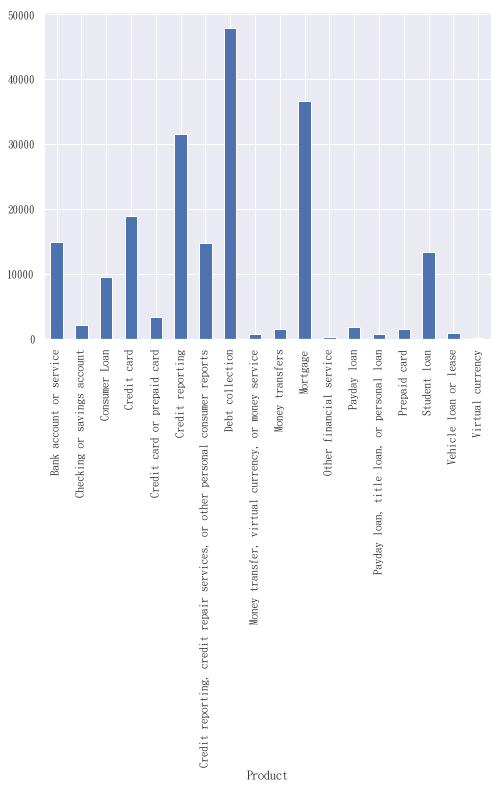

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)
sns.set(font=myfont.get_name())
%matplotlib inline

fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

In [114]:
raw_ = df.Consumer_complaint_narrative

In [115]:
features = tfidf.fit_transform(raw_)

In [116]:
labels = df.category_id
features.shape

(199970, 419701)

In [117]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Product))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'Bank account or service':
  . Most correlated unigrams:
       . bank
       . overdraft
  . Most correlated bigrams:
       . overdraft fees
       . checking account
# 'Checking or savings account':
  . Most correlated unigrams:
       . deposit
       . app
  . Most correlated bigrams:
       . use app
       . xxxx app
# 'Consumer Loan':
  . Most correlated unigrams:
       . car
       . vehicle
  . Most correlated bigrams:
       . car loan
       . auto loan
# 'Credit card':
  . Most correlated unigrams:
       . macy
       . card
  . Most correlated bigrams:
       . american express
       . credit card
# 'Credit card or prepaid card':
  . Most correlated unigrams:
       . comenity
       . card
  . Most correlated bigrams:
       . xxxx 2017
       . credit card
# 'Credit reporting':
  . Most correlated unigrams:
       . experian
       . equifax
  . Most correlated bigrams:
       . trans union
       . credit report
# 'Credit reporting, credit repair services, or othe

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [119]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Debt collection']


In [120]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['Credit reporting']


In [121]:
df[df['Consumer_complaint_narrative'] == "This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]

,Product,Consumer_complaint_narrative,category_id
12,Debt collection,This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine.,2


In [122]:
df[df['Consumer_complaint_narrative'] == "I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]

,Product,Consumer_complaint_narrative,category_id
61,Credit reporting,I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned i...,0


### Save Classification with Scikit-Learn model

In [123]:
import pickle
with open('model/Sklearn/MultinomialNB/model_cat_sklearn_vectorizer.pkl', 'wb') as handle:
    pickle.dump(count_vect, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('model/Sklearn/MultinomialNB/model_cat_sklearn_transformer.pkl', 'wb') as handle:
    pickle.dump(tfidf_transformer, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('model/Sklearn/MultinomialNB/model_cat_sklearn_clf.pkl', 'wb') as handle:
    pickle.dump(clf, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Load Classification with Scikit-Learn model

In [124]:
import pickle
with open('model/Sklearn/MultinomialNB/model_cat_sklearn_vectorizer.pkl', 'rb') as handle:
    sklearn_vectorizer = pickle.load(handle)
with open('model/Sklearn/MultinomialNB/model_cat_sklearn_transformer.pkl', 'rb') as handle:
    sklearn_transformer = pickle.load(handle)
with open('model/Sklearn/MultinomialNB/model_cat_sklearn_clf.pkl', 'rb') as handle:
    sklearn_clf = pickle.load(handle)

In [125]:
content_string = "I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"
print( sklearn_clf.predict(sklearn_vectorizer.transform([content_string])) )

['Credit reporting']


In [126]:
content_string = "I want to deposit my money"
print( sklearn_clf.predict(sklearn_vectorizer.transform([content_string])) )

['Bank account or service']


In [127]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


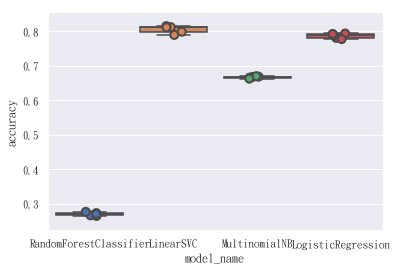

In [128]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [129]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.804761
LogisticRegression        0.785878
MultinomialNB             0.666480
RandomForestClassifier    0.270241
Name: accuracy, dtype: float64

### LinearSVC

In [130]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [131]:
print("預測的文章類別為：\n", y_pred)
print("準確率：", model.score(X_test, y_test))

預測的文章類別為：
 [6 6 3 ... 0 3 7]
準確率： 0.8229455531814944


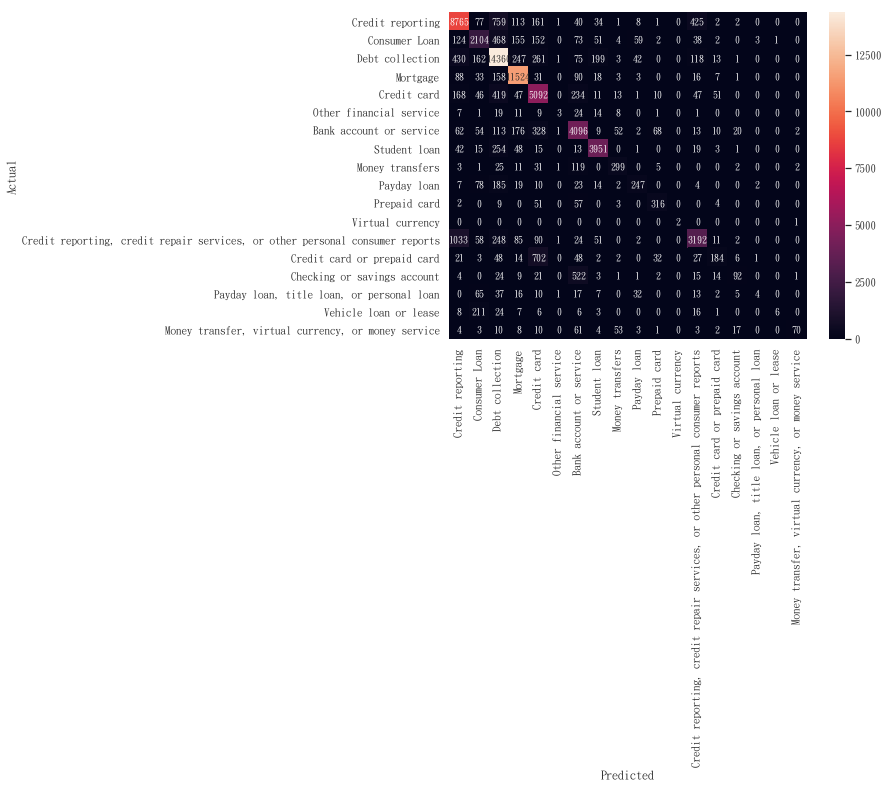

In [132]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [133]:
model.fit(features, labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

### Save LinearSVC model

In [134]:
import pickle
with open('model/Sklearn/LinearSVC/model_cat_svc_vectorizer.pkl', 'wb') as handle:
    pickle.dump(count_vect, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('model/Sklearn/LinearSVC/model_cat_svc_tfidf.pkl', 'wb') as handle:
    pickle.dump(tfidf, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('model/Sklearn/LinearSVC/model_cat_svc_model.pkl', 'wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Load LinearSVC model

In [135]:
import pickle
with open('model/Sklearn/LinearSVC/model_cat_svc_vectorizer.pkl', 'rb') as handle:
    LinearSVC_vectorizer = pickle.load(handle)
with open('model/Sklearn/LinearSVC/model_cat_svc_tfidf.pkl', 'rb') as handle:
    LinearSVC_tfidf = pickle.load(handle)
with open('model/Sklearn/LinearSVC/model_cat_svc_model.pkl', 'rb') as handle:
    LinearSVC_model = pickle.load(handle)

In [136]:
texts = ["I requested a home loan modification through Bank of America. Bank of America never got back to me.",
         "It has been difficult for me to find my past due balance. I missed a regular monthly payment",
         "I can't get the money out of the country.",
         "I have no money to pay my tuition",
         "Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"]
text_features = LinearSVC_tfidf.transform(texts)
predictions = LinearSVC_model.predict(text_features)

In [137]:
predictions

array([ 3,  3,  8,  2, 17], dtype=int64)

In [138]:
sector = df.groupby('Product')
sector.size()

Product
Bank account or service                                                         14888
Checking or savings account                                                      2142
Consumer Loan                                                                    9474
Credit card                                                                     18842
Credit card or prepaid card                                                      3355
Credit reporting                                                                31592
Credit reporting, credit repair services, or other personal consumer reports    14671
Debt collection                                                                 47915
Money transfer, virtual currency, or money service                                684
Money transfers                                                                  1496
Mortgage                                                                        36582
Other financial service                       

In [139]:
sector.describe()

category_id  \
                                                                                   count   
Product                                                                                    
Bank account or service                                                          14888.0   
Checking or savings account                                                       2142.0   
Consumer Loan                                                                     9474.0   
Credit card                                                                      18842.0   
Credit card or prepaid card                                                       3355.0   
Credit reporting                                                                 31592.0   
Credit reporting, credit repair services, or other personal consumer reports     14671.0   
Debt collection                                                                  47915.0   
Money transfer, virtual currency, or money service                                 684.0   
Money transfers                                                                   1496.0   
Mortgage                                                                         36582.0   
Other financial service                                                            292.0   
Payday loan                                                                       1748.0   
Payday loan, title loan, or personal loan                                          697.0   
Prepaid card                                                                      1451.0   
Student loan                                                                     13304.0   
Vehicle loan or lease                                                              821.0   
Virtual currency                                                                    16.0   

                                                                                    \
                                                                              mean   
Product                                                                              
Bank account or service                                                        6.0   
Checking or savings account                                                   14.0   
Consumer Loan                                                                  1.0   
Credit card                                                                    4.0   
Credit card or prepaid card                                                   13.0   
Credit reporting                                                               0.0   
Credit reporting, credit repair services, or other personal consumer reports  12.0   
Debt collection                                                                2.0   
Money transfer, virtual currency, or money service                            17.0   
Money transfers                                                                8.0   
Mortgage                                                                       3.0   
Other financial service                                                        5.0   
Payday loan                                                                    9.0   
Payday loan, title loan, or personal loan                                     15.0   
Prepaid card                                                                  10.0   
Student loan                                                                   7.0   
Vehicle loan or lease                                                         16.0   
Virtual currency                                                              11.0   

                                                                                   \
                                                                              std   
Product                                                                             
Bank account or service                                                       0.0 

In [140]:
df_ = df.groupby( ["Product"] ).count()
df_.head()

,Consumer_complaint_narrative,category_id
Product,,
Bank account or service,14888,14888
Checking or savings account,2142,2142
Consumer Loan,9474,9474
Credit card,18842,18842
Credit card or prepaid card,3355,3355


In [141]:
for x in predictions:
    cat = df.loc[df['category_id'] == x ].head(1)["Product"]
    print(cat)

25    Mortgage
Name: Product, dtype: object
25    Mortgage
Name: Product, dtype: object
167    Money transfers
Name: Product, dtype: object
12    Debt collection
Name: Product, dtype: object
101666    Money transfer, virtual currency, or money service
Name: Product, dtype: object


In [142]:
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(LinearSVC_tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(Product))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Bank account or service':
  . Top unigrams:
       . bank
       . scottrade
  . Top bigrams:
       . debit card
       . xx 2017
# 'Checking or savings account':
  . Top unigrams:
       . ank
       . th
  . Top bigrams:
       . xx xxxx
       . xxxx xxxx
# 'Consumer Loan':
  . Top unigrams:
       . car
       . ally
  . Top bigrams:
       . drive time
       . payments misapplied
# 'Credit card':
  . Top unigrams:
       . card
       . capital
  . Top bigrams:
       . american express
       . xx 2017
# 'Credit card or prepaid card':
  . Top unigrams:
       . th
       . card
  . Top bigrams:
       . xx xxxx
       . xxxx xxxx
# 'Credit reporting':
  . Top unigrams:
       . experian
       . equifax
  . Top bigrams:
       . xxxx bank
       . 17 00
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . 2017
       . breach
  . Top bigrams:
       . xxxx xxxx
       . xx xxxx
# 'Debt collection':
  . Top unigrams:
   

### Update LinearSVC model

In [143]:
import pickle
with open('model/Sklearn/LinearSVC/model_cat_svc_vectorizer.pkl', 'wb') as handle:
    pickle.dump(count_vect, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('model/Sklearn/LinearSVC/model_cat_svc_tfidf.pkl', 'wb') as handle:
    pickle.dump(tfidf, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('model/Sklearn/LinearSVC/model_cat_svc_model.pkl', 'wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Load LinearSVC model

In [144]:
import pickle
with open('model/Sklearn/LinearSVC/model_cat_svc_vectorizer.pkl', 'rb') as handle:
    LinearSVC_vectorizer = pickle.load(handle)
with open('model/Sklearn/LinearSVC/model_cat_svc_tfidf.pkl', 'rb') as handle:
    LinearSVC_tfidf = pickle.load(handle)
with open('model/Sklearn/LinearSVC/model_cat_svc_model.pkl', 'rb') as handle:
    LinearSVC_model = pickle.load(handle)

In [145]:
texts = ["I requested a home loan modification through Bank of America. Bank of America never got back to me.",
         "It has been difficult for me to find my past due balance. I missed a regular monthly payment",
         "I can't get the money out of the country.",
         "I have no money to pay my tuition",
         "Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"]
text_features = LinearSVC_tfidf.transform(texts)
predictions = LinearSVC_model.predict(text_features)

In [146]:
predictions

array([ 3,  3,  8,  2, 17], dtype=int64)

### Homework
- 尋找網路上具有問題分類的語料
- 套用LinearSVC訓練
- 提出你的模型調整與經驗